In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
card_df = pd.read_csv(r'C:\\Users\\ejr93\\Desktop\\빅콘\\가공데이터\\card_ppc_df.csv')
card_df.head()

,Unnamed: 0,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,0,2018-04-01,종로구,청운효자동,21,1,30,4,180
1,1,2018-04-01,종로구,청운효자동,21,1,55,4,22
2,2,2018-04-01,종로구,청운효자동,21,0,20,35,184
3,3,2018-04-01,종로구,청운효자동,21,0,25,70,425
4,4,2018-04-01,종로구,청운효자동,21,0,30,18,82


In [3]:
card_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
card_df.rename(columns = {'STD_DD' : 'time', 'GU_CD' : 'gu', 'DONG_CD' : 'dong'}, inplace = True)

In [5]:
card_df['time'] = card_df['time'].astype(str)

In [6]:
dust_count_df = pd.read_csv(r'C:\\Users\\ejr93\\Desktop\\빅콘\\가공데이터\\dust_count.csv', encoding = 'CP949')
dust_count_df.head()

,time,fine_total,cnt_total,new_total
0,2018-04-01,5948,2419,2.458867
1,2018-04-02,7482,2811,2.661686
2,2018-04-03,7095,2762,2.568791
3,2018-04-04,7315,2799,2.613433
4,2018-04-05,5645,1911,2.953951


In [7]:
card_sns_df = pd.merge(card_df, dust_count_df, on = ['time'])
card_sns_df.head()

,time,gu,dong,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,fine_total,cnt_total,new_total
0,2018-04-01,종로구,청운효자동,21,1,30,4,180,5948,2419,2.458867
1,2018-04-01,종로구,청운효자동,21,1,55,4,22,5948,2419,2.458867
2,2018-04-01,종로구,청운효자동,21,0,20,35,184,5948,2419,2.458867
3,2018-04-01,종로구,청운효자동,21,0,25,70,425,5948,2419,2.458867
4,2018-04-01,종로구,청운효자동,21,0,30,18,82,5948,2419,2.458867


In [8]:
card_sns_df.head()

,time,gu,dong,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,fine_total,cnt_total,new_total
0,2018-04-01,종로구,청운효자동,21,1,30,4,180,5948,2419,2.458867
1,2018-04-01,종로구,청운효자동,21,1,55,4,22,5948,2419,2.458867
2,2018-04-01,종로구,청운효자동,21,0,20,35,184,5948,2419,2.458867
3,2018-04-01,종로구,청운효자동,21,0,25,70,425,5948,2419,2.458867
4,2018-04-01,종로구,청운효자동,21,0,30,18,82,5948,2419,2.458867


In [9]:
card_sns_df.drop(['gu','dong','USE_CNT' ,'SEX_CD', 'AGE_CD', 'fine_total', 'new_total'], axis = 1, inplace = True)

In [10]:
card_sns_df.head()

,time,MCT_CAT_CD,USE_AMT,cnt_total
0,2018-04-01,21,180,2419
1,2018-04-01,21,22,2419
2,2018-04-01,21,184,2419
3,2018-04-01,21,425,2419
4,2018-04-01,21,82,2419


In [11]:
card_sns_group_df = card_sns_df.groupby(by = ['time', 'MCT_CAT_CD']).agg({'USE_AMT' : 'sum', 'cnt_total' : 'mean'})

In [12]:
card_sns_group_df.reset_index(inplace=True)

In [13]:
card_sns_group_df.head()

,time,MCT_CAT_CD,USE_AMT,cnt_total
0,2018-04-01,10,171130,2419
1,2018-04-01,20,160087,2419
2,2018-04-01,21,237997,2419
3,2018-04-01,22,111126,2419
4,2018-04-01,30,21890,2419


In [14]:
card_sns_group_df.describe()

,MCT_CAT_CD,USE_AMT,cnt_total
count,8348.000000,8.348000e+03,8348.000000
mean,45.835410,6.263948e+05,2114.029588
std,21.452123,1.238689e+06,679.781599
min,10.000000,1.300000e+01,384.000000
25%,31.000000,2.918000e+04,1571.000000
50%,42.000000,1.499770e+05,2182.000000
75%,62.000000,3.876925e+05,2747.000000
max,92.000000,6.937024e+06,3524.000000


In [15]:
card_sns_group_10_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 10]
card_sns_group_20_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 20]
card_sns_group_21_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 21]
card_sns_group_22_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 22]
card_sns_group_30_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 30]
card_sns_group_31_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 31]
card_sns_group_32_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 32]
card_sns_group_33_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 33]
card_sns_group_34_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 34]
card_sns_group_35_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 35]
card_sns_group_40_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 40]
card_sns_group_42_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 42]
card_sns_group_43_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 43]
card_sns_group_44_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 44]
card_sns_group_50_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 50]
card_sns_group_52_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 52]
card_sns_group_60_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 60]
card_sns_group_62_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 62]
card_sns_group_70_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 70]
card_sns_group_71_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 71]
card_sns_group_80_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 80]
card_sns_group_81_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 81]
card_sns_group_92_df = card_sns_group_df[card_sns_group_df['MCT_CAT_CD'] == 92]

In [238]:
card_sns_group_10_df.reset_index(inplace=True)
card_sns_group_20_df.reset_index(inplace=True)
card_sns_group_21_df.reset_index(inplace=True)
card_sns_group_22_df.reset_index(inplace=True)
card_sns_group_30_df.reset_index(inplace=True)
card_sns_group_31_df.reset_index(inplace=True)
card_sns_group_32_df.reset_index(inplace=True)
card_sns_group_33_df.reset_index(inplace=True)
card_sns_group_34_df.reset_index(inplace=True)
card_sns_group_35_df.reset_index(inplace=True)
card_sns_group_40_df.reset_index(inplace=True)
card_sns_group_42_df.reset_index(inplace=True)
card_sns_group_43_df.reset_index(inplace=True)
card_sns_group_44_df.reset_index(inplace=True)
card_sns_group_50_df.reset_index(inplace=True)
card_sns_group_52_df.reset_index(inplace=True)
card_sns_group_60_df.reset_index(inplace=True)
card_sns_group_62_df.reset_index(inplace=True)
card_sns_group_70_df.reset_index(inplace=True)
card_sns_group_71_df.reset_index(inplace=True)
card_sns_group_80_df.reset_index(inplace=True)
card_sns_group_81_df.reset_index(inplace=True)
card_sns_group_92_df.reset_index(inplace=True)

In [17]:
card_sns_group_10_df.head()

,index,time,MCT_CAT_CD,USE_AMT,cnt_total
0,0,2018-04-01,10,171130,2419
1,22,2018-04-02,10,93369,2811
2,45,2018-04-03,10,116075,2762
3,68,2018-04-04,10,84254,2799
4,91,2018-04-05,10,106643,1911


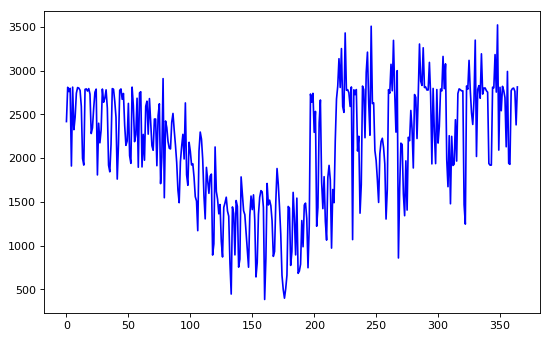

In [18]:
plt.figure(figsize=(8,5), dpi=80)
plt.plot(card_sns_group_21_df['cnt_total'], color = 'blue')

In [19]:
from statsmodels.tsa.stattools import adfuller

#10 분석

In [20]:
#모든 변수 분산 안정화 변환
cnt_total_10_log = np.log1p(card_sns_group_10_df['cnt_total'])
USE_AMT_10_log = np.log1p(card_sns_group_10_df['USE_AMT'])

In [21]:
adfuller(cnt_total_10_log) # 10 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [22]:
cnt_total_10_log_diff1 =np.diff(cnt_total_10_log) 
adfuller(cnt_total_10_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

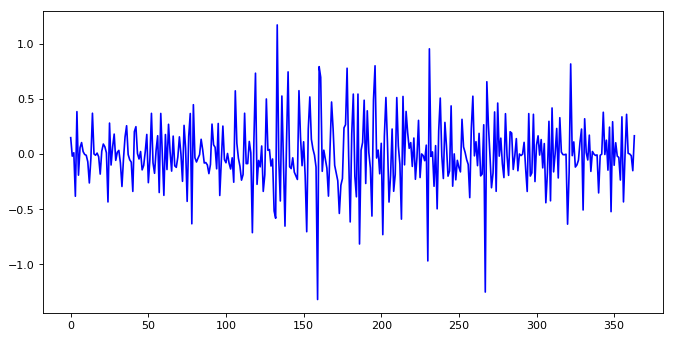

In [23]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_10_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

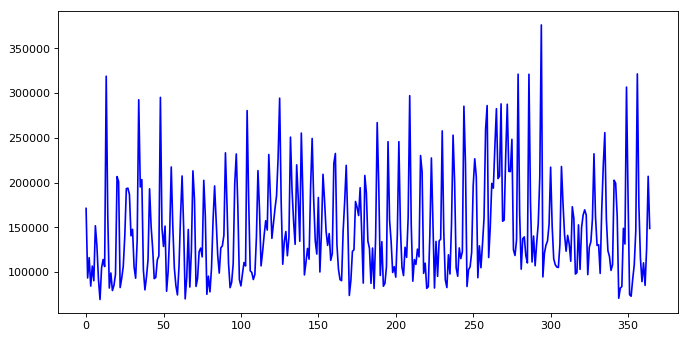

In [24]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_10_df['USE_AMT'], color = 'blue')

In [25]:
adfuller(USE_AMT_10_log) # 10 매출액 : 정상시계열

(-3.392063330266603,
 0.011232426050395103,
 17,
 347,
 {'1%': -3.449336554273722,
  '5%': -2.8699055166063085,
  '10%': -2.571226758215748},
 -21.355359237595053)

In [26]:
USE_AMT_10_log_diff1 = np.diff(USE_AMT_10_log)

In [27]:
adfuller(USE_AMT_10_log_diff1) # 10 매출액 1차 차분: 정상시계열

(-9.244409394352434,
 1.5513070622615485e-15,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -13.773802745559465)

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

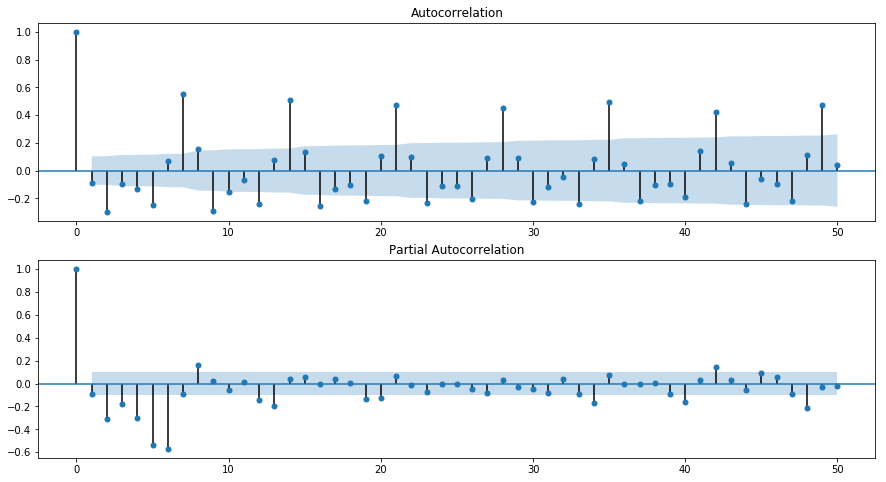

In [29]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_10_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_10_log_diff1, lags=50, ax=ax[1])
plt.show()

In [30]:
model_10 = sm.tsa.SARIMAX(USE_AMT_10_log,
                          order=(1,1,1),
                          seasonal_order=(3,1,0,7),
                         exog =cnt_total_10_log)
results_10 = model_10.fit()
print (results_10.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(3, 1, 0, 7)   Log Likelihood                  10.695
Date:                           Mon, 09 Sep 2019   AIC                             -7.391
Time:                                   22:47:50   BIC                             19.753
Sample:                                        0   HQIC                             3.405
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total     -0.1870      0.047     -3.951      0.000      -0.280      -0.094
ar.L1          0.1083      0.058      1.865

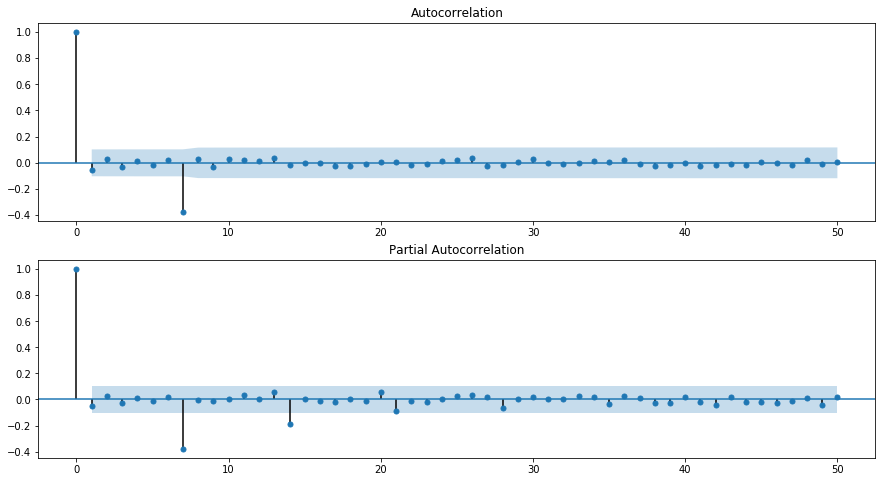

In [31]:
res_10 = results_10.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_10, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_10, lags=50, ax=ax[1])
plt.show()

#20 분석

In [32]:
#모든 변수 분산 안정화 변환
cnt_total_20_log = np.log1p(card_sns_group_20_df['cnt_total'])
USE_AMT_20_log = np.log1p(card_sns_group_20_df['USE_AMT'])

In [33]:
adfuller(cnt_total_20_log) # 20 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [34]:
import statsmodels

In [35]:
cnt_total_20_log_diff1 =np.diff(cnt_total_20_log) 
adfuller(cnt_total_20_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

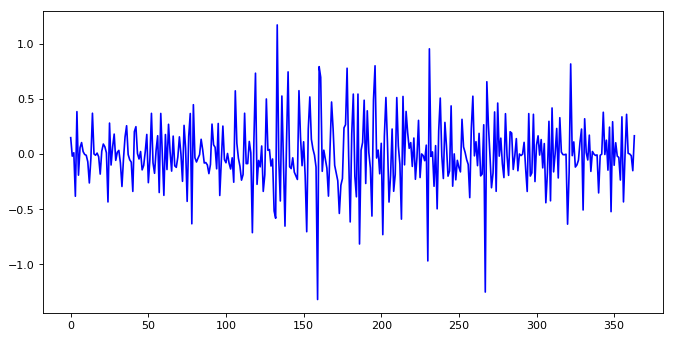

In [195]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_20_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

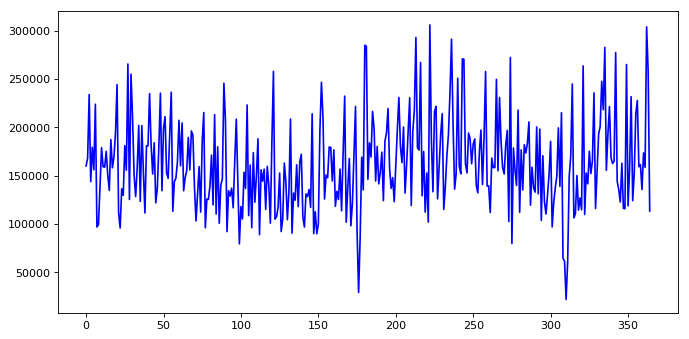

In [196]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_20_df['USE_AMT'], color = 'blue')

In [38]:
adfuller(USE_AMT_20_log) # 20 매출액 : 정상시계열(유의수준 5%)

(-2.988430080776485,
 0.03598910330019015,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 122.68706282982896)

In [39]:
USE_AMT_20_log_diff1 = np.diff(USE_AMT_20_log)
adfuller(USE_AMT_20_log_diff1) #20 매출액 1차 차분 : 정상시계열

(-8.076154329451299,
 1.5036124243722687e-12,
 13,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 130.5285127014132)

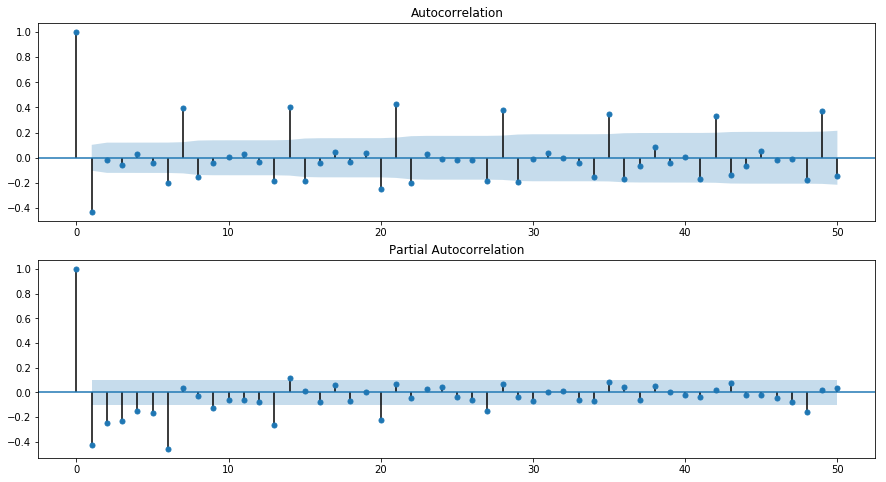

In [40]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_20_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_20_log_diff1, lags=50, ax=ax[1])
plt.show()

In [41]:
model_20 = sm.tsa.SARIMAX(USE_AMT_20_log,
                          order=(1,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_20_log)
results_20 = model_20.fit()
print (results_20.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 -23.293
Date:                           Mon, 09 Sep 2019   AIC                             56.586
Time:                                   22:47:55   BIC                             75.975
Sample:                                        0   HQIC                            64.298
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.1749      0.047      3.723      0.000       0.083       0.267
ar.L1          0.2085      0.055      3.762

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


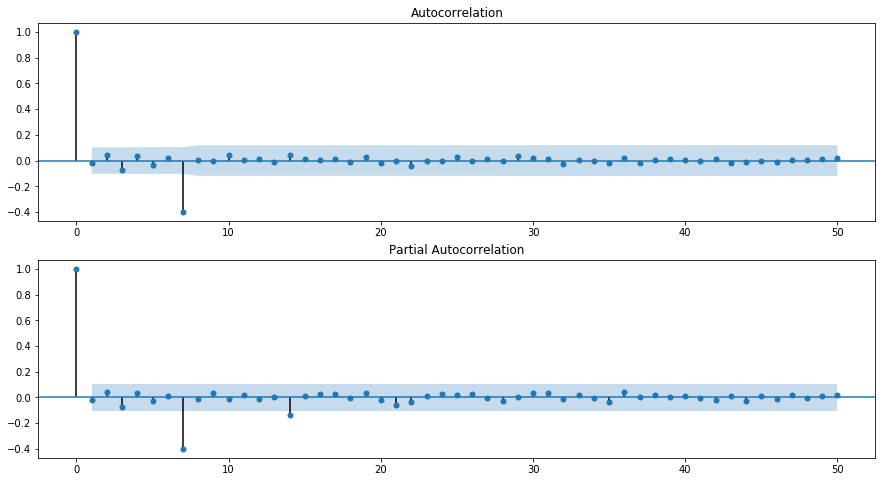

In [42]:
res_20 = results_20.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_20, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_20, lags=50, ax=ax[1])
plt.show()

#21 분석

In [43]:
#모든 변수 분산 안정화 변환
cnt_total_21_log = np.log1p(card_sns_group_21_df['cnt_total'])
USE_AMT_21_log = np.log1p(card_sns_group_21_df['USE_AMT'])

In [44]:
adfuller(cnt_total_21_log) # 21 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [45]:
cnt_total_21_log_diff1 =np.diff(cnt_total_21_log) 
adfuller(cnt_total_21_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

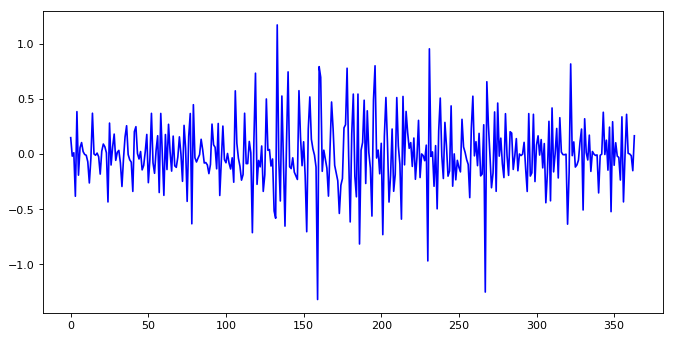

In [197]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_21_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

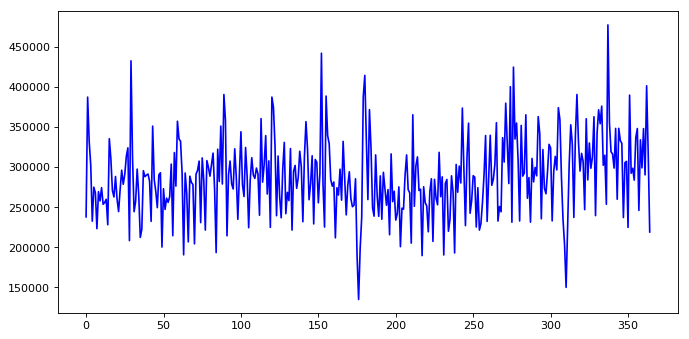

In [198]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_21_df['USE_AMT'], color = 'blue')

In [48]:
adfuller(USE_AMT_21_log) # 21 매출액 : 정상시계열

(-2.938907369637522,
 0.04100707554890541,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -341.8748865048568)

In [49]:
USE_AMT_21_log_diff1 = np.diff(USE_AMT_21_log)
adfuller(USE_AMT_21_log_diff1) #42 매출액 1차 차분 : 정상시계열

(-9.205077338047644,
 1.9548017830394844e-15,
 13,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -333.1887463989601)

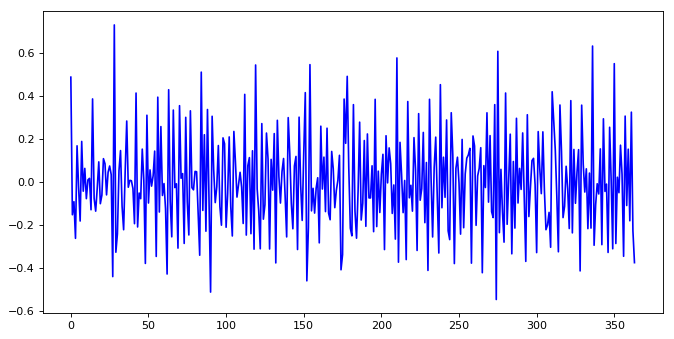

In [50]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(USE_AMT_21_log_diff1, color = 'blue')

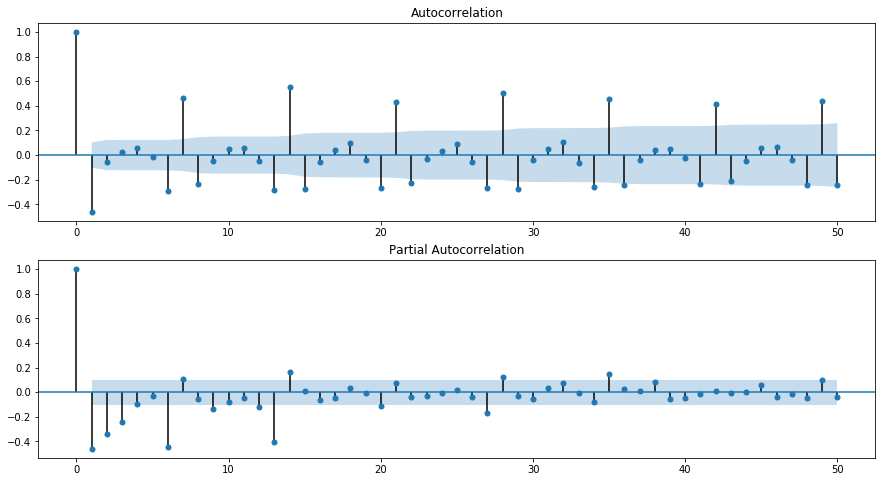

In [51]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_21_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_21_log_diff1, lags=50, ax=ax[1])
plt.show()

In [52]:
model_21 = sm.tsa.SARIMAX(USE_AMT_21_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,2,7),
                         exog =cnt_total_10_log)
results_21 = model_21.fit()
print (results_21.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 2, 7)   Log Likelihood                 217.484
Date:                           Mon, 09 Sep 2019   AIC                           -420.968
Time:                                   22:48:01   BIC                           -393.824
Sample:                                        0   HQIC                          -410.172
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.0791      0.025      3.132      0.002       0.030       0.129
ar.L1          0.2678      0.051      5.248

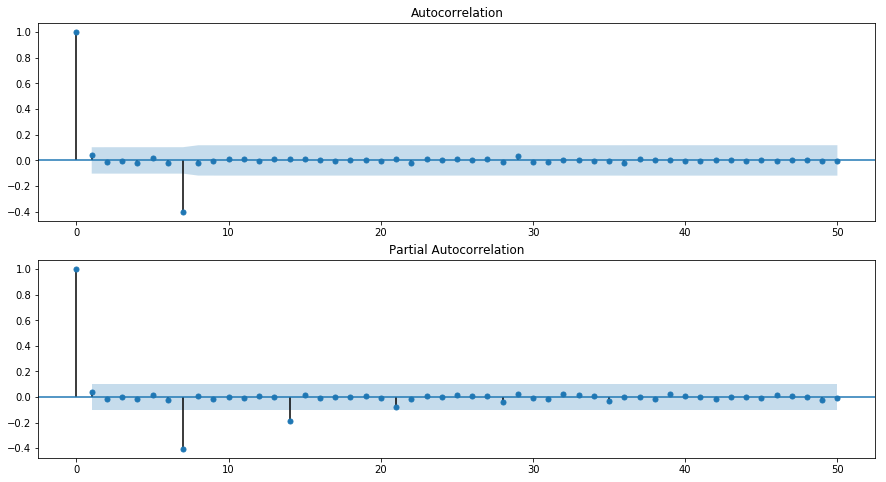

In [53]:
res_21 = results_21.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_21, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_21, lags=50, ax=ax[1])
plt.show()

#22 분석

In [54]:
#모든 변수 분산 안정화 변환
cnt_total_22_log = np.log1p(card_sns_group_22_df['cnt_total'])
USE_AMT_22_log = np.log1p(card_sns_group_22_df['USE_AMT'])

In [55]:
adfuller(cnt_total_22_log) # 22 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [56]:
cnt_total_22_log_diff1 =np.diff(cnt_total_22_log) 
adfuller(cnt_total_22_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

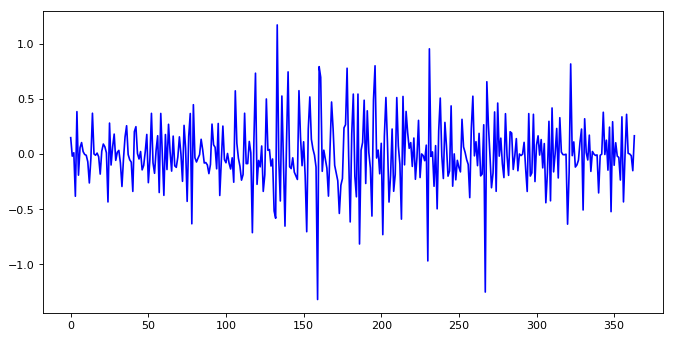

In [199]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_22_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

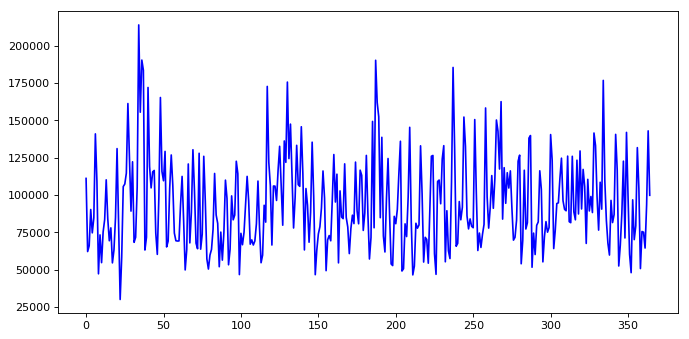

In [200]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_22_df['USE_AMT'], color = 'blue')

In [59]:
adfuller(USE_AMT_22_log) # 22 매출액 : 정상시계열(유의수준 5%)

(-4.132981600155406,
 0.0008538389782265094,
 15,
 349,
 {'1%': -3.449226932880019,
  '5%': -2.869857365438656,
  '10%': -2.571201085130664},
 19.957913200640064)

In [60]:
USE_AMT_22_log_diff1 = np.diff(USE_AMT_22_log)
adfuller(USE_AMT_22_log_diff1) #42 매출액 1차 차분 : 정상시계열

(-6.106169147770406,
 9.573197927521485e-08,
 14,
 349,
 {'1%': -3.449226932880019,
  '5%': -2.869857365438656,
  '10%': -2.571201085130664},
 36.84139148001839)

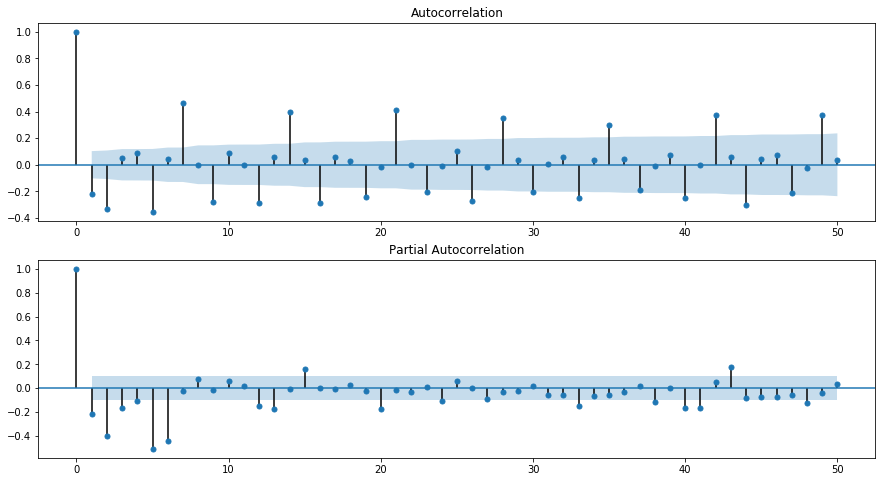

In [61]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_22_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_22_log_diff1, lags=50, ax=ax[1])
plt.show()

In [194]:
model_22 = sm.tsa.SARIMAX(USE_AMT_22_log,
                          order=(1,1,2),
                          seasonal_order=(1,1,0,7),
                         exog =cnt_total_22_log)
results_22 = model_22.fit()
print (results_22.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 2)x(1, 1, 0, 7)   Log Likelihood                 -33.983
Date:                           Mon, 09 Sep 2019   AIC                             79.965
Time:                                   22:54:39   BIC                            103.232
Sample:                                        0   HQIC                            89.219
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total     -0.1620      0.049     -3.294      0.001      -0.258      -0.066
ar.L1          0.7792      0.115      6.749

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


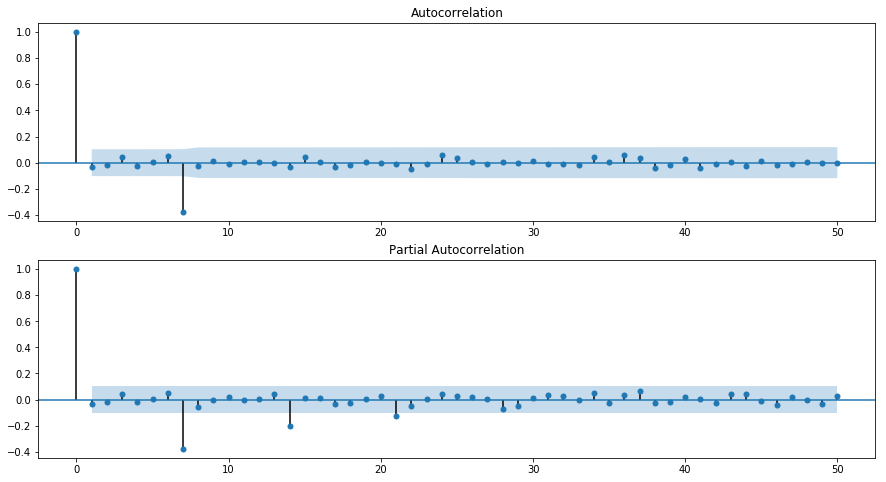

In [63]:
res_22 = results_22.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_22, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_22, lags=50, ax=ax[1])
plt.show()

#33 분석

In [64]:
#모든 변수 분산 안정화 변환
cnt_total_33_log = np.log1p(card_sns_group_33_df['cnt_total'])
USE_AMT_33_log = np.log1p(card_sns_group_33_df['USE_AMT'])

In [65]:
adfuller(cnt_total_33_log) # 33 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [66]:
cnt_total_33_log_diff1 =np.diff(cnt_total_33_log) 
adfuller(cnt_total_33_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

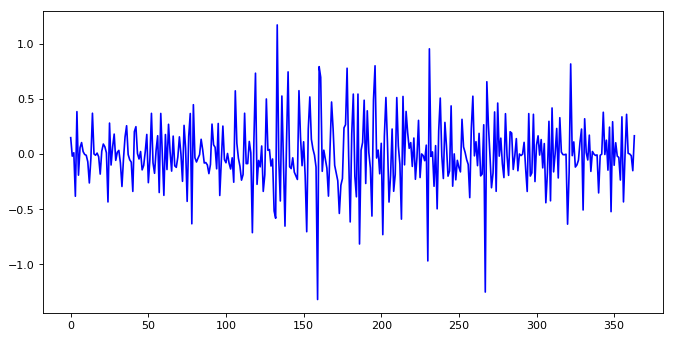

In [201]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_33_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

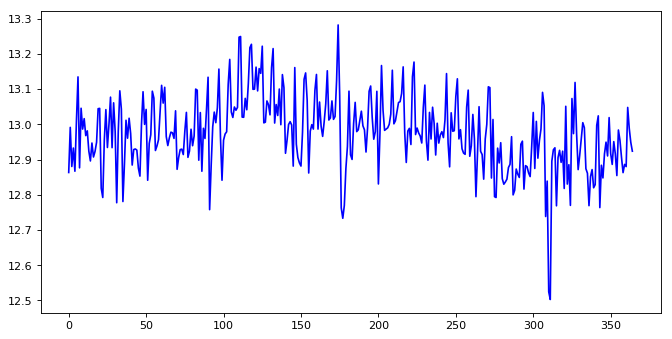

In [202]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(USE_AMT_33_log, color = 'blue')

In [69]:
adfuller(USE_AMT_33_log) # 33 매출액 : 비정상시계열

(-2.481508627705044,
 0.12003854446950885,
 16,
 348,
 {'1%': -3.4492815848836296,
  '5%': -2.8698813715275406,
  '10%': -2.5712138845950587},
 -738.0430954604258)

In [70]:
statsmodels.tsa.stattools.coint(USE_AMT_33_log, cnt_total_33_log, trend = 'nc') #H0 : "공적분 존재 안함" 기각 못함

(-1.3180051974550815, 0.5575725967616844, [nan, nan, nan])

In [71]:
USE_AMT_33_log_diff1 = np.diff(USE_AMT_33_log)
adfuller(USE_AMT_33_log_diff1) #33 매출액 1차 차분 : 정상시계열

(-7.984493967418007,
 2.570606125926333e-12,
 13,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -731.8543842090783)

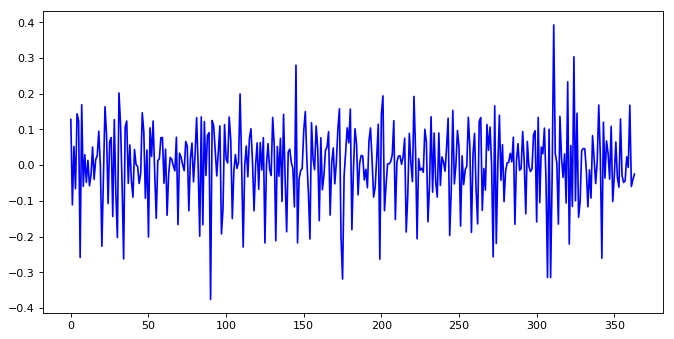

In [203]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(USE_AMT_33_log_diff1, color = 'blue')

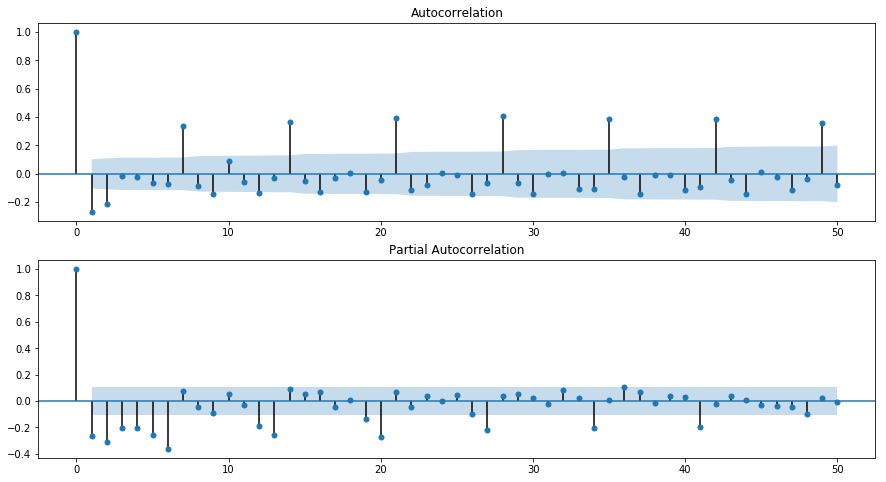

In [73]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_33_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_33_log_diff1, lags=50, ax=ax[1])
plt.show()

In [74]:
model_33 = sm.tsa.SARIMAX(USE_AMT_33_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,1,7),
                         exog =cnt_total_33_log)
results_33 = model_33.fit()
print (results_33.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 419.446
Date:                           Mon, 09 Sep 2019   AIC                           -826.892
Time:                                   22:48:12   BIC                           -803.625
Sample:                                        0   HQIC                          -817.637
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.0328      0.015      2.158      0.031       0.003       0.063
ar.L1          0.2830      0.048      5.883

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


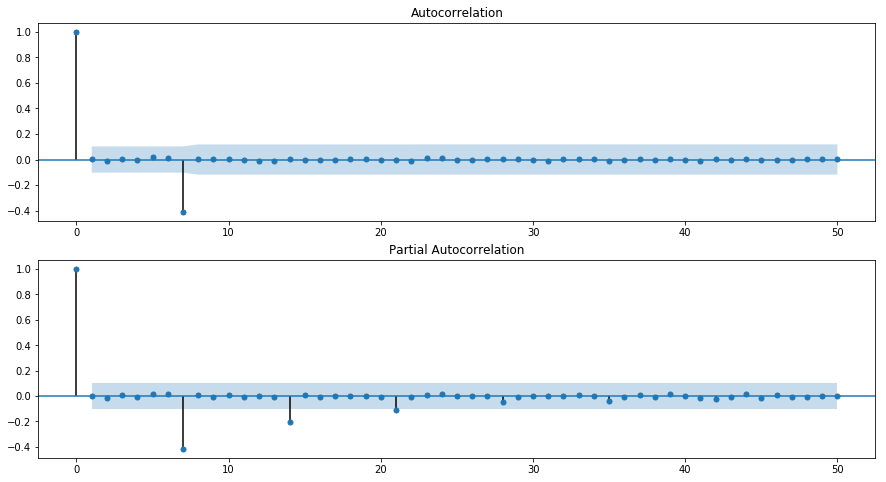

In [75]:
res_33 = results_33.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_33, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_33, lags=50, ax=ax[1])
plt.show()

#40 분석

In [76]:
#모든 변수 분산 안정화 변환
cnt_total_40_log = np.log1p(card_sns_group_40_df['cnt_total'])
USE_AMT_40_log = np.log1p(card_sns_group_40_df['USE_AMT'])

In [77]:
adfuller(cnt_total_40_log) # 40 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [78]:
cnt_total_40_log_diff1 =np.diff(cnt_total_40_log) 
adfuller(cnt_total_40_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

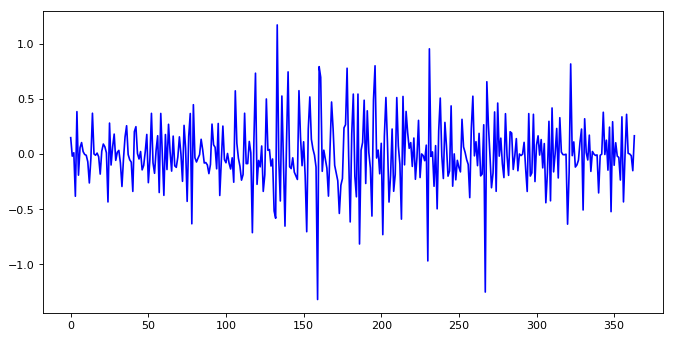

In [204]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_40_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

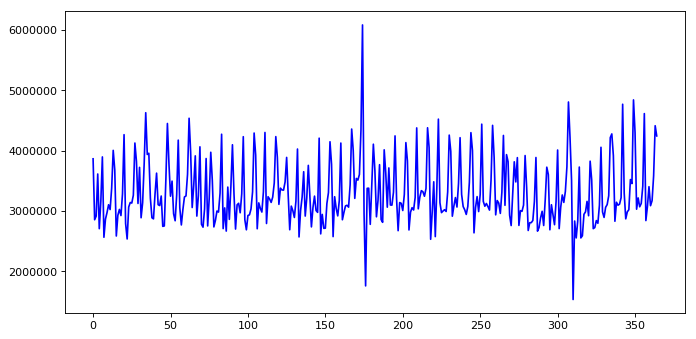

In [205]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_40_df['USE_AMT'], color = 'blue')

In [81]:
adfuller(USE_AMT_40_log) # 40 매출액 : 정상시계열(유의수준 5%)

(-3.2856676973581442,
 0.015531411193871896,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -506.3816049563151)

In [82]:
USE_AMT_40_log_diff1 = np.diff(USE_AMT_40_log)
adfuller(USE_AMT_40_log_diff1) #40 매출액 1차 차분 : 정상시계열

(-12.987263080235206,
 2.8610081618068677e-24,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -495.35935113440814)

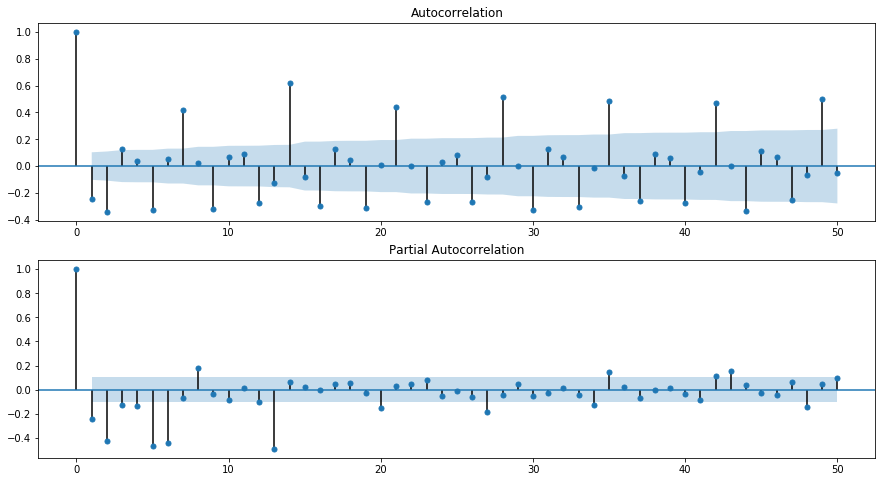

In [83]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_40_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_40_log_diff1, lags=50, ax=ax[1])
plt.show()

In [84]:
model_40 = sm.tsa.SARIMAX(USE_AMT_40_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,1,7),
                         exog =cnt_total_40_log)
results_40 = model_40.fit()
print (results_40.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 286.168
Date:                           Mon, 09 Sep 2019   AIC                           -560.337
Time:                                   22:48:16   BIC                           -537.070
Sample:                                        0   HQIC                          -551.083
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.0267      0.021      1.277      0.202      -0.014       0.068
ar.L1          0.1411      0.052      2.699

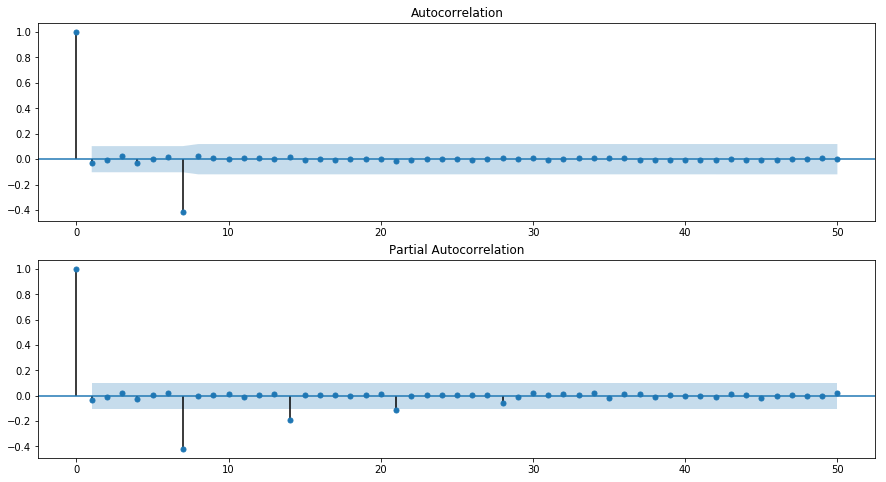

In [85]:
res_40 = results_40.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_40, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_40, lags=50, ax=ax[1])
plt.show()

#42 분석

In [86]:
#모든 변수 분산 안정화 변환
cnt_total_42_log = np.log1p(card_sns_group_42_df['cnt_total'])
USE_AMT_42_log = np.log1p(card_sns_group_42_df['USE_AMT'])

In [87]:
adfuller(cnt_total_42_log) # 42 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [88]:
cnt_total_42_log_diff1 =np.diff(cnt_total_42_log) 
adfuller(cnt_total_42_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

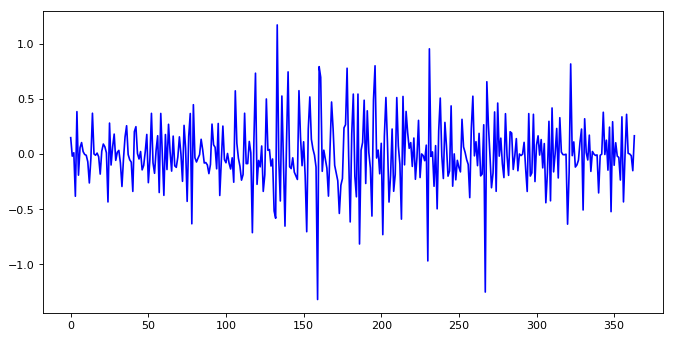

In [206]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_42_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

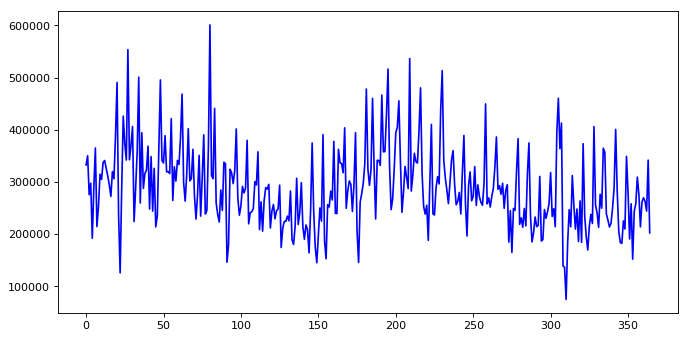

In [207]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_42_df['USE_AMT'], color = 'blue')

In [91]:
adfuller(USE_AMT_42_log) # 42 매출액 : 비정상 시계열

(-2.066212492038493,
 0.25831589395801025,
 16,
 348,
 {'1%': -3.4492815848836296,
  '5%': -2.8698813715275406,
  '10%': -2.5712138845950587},
 -88.95244522022256)

In [92]:
statsmodels.tsa.stattools.coint(USE_AMT_42_log, cnt_total_42_log, trend = 'nc') #H0 : "공적분 존재 안함" 기각 못함

(-1.3685817837684338, 0.5328424997963344, [nan, nan, nan])

In [93]:
USE_AMT_42_log_diff1 = np.diff(USE_AMT_42_log)
adfuller(USE_AMT_42_log_diff1) #42 매출액 1차 차분 : 정상시계열

(-7.479527528115967,
 4.813358078295936e-11,
 15,
 348,
 {'1%': -3.4492815848836296,
  '5%': -2.8698813715275406,
  '10%': -2.5712138845950587},
 -85.18728458181977)

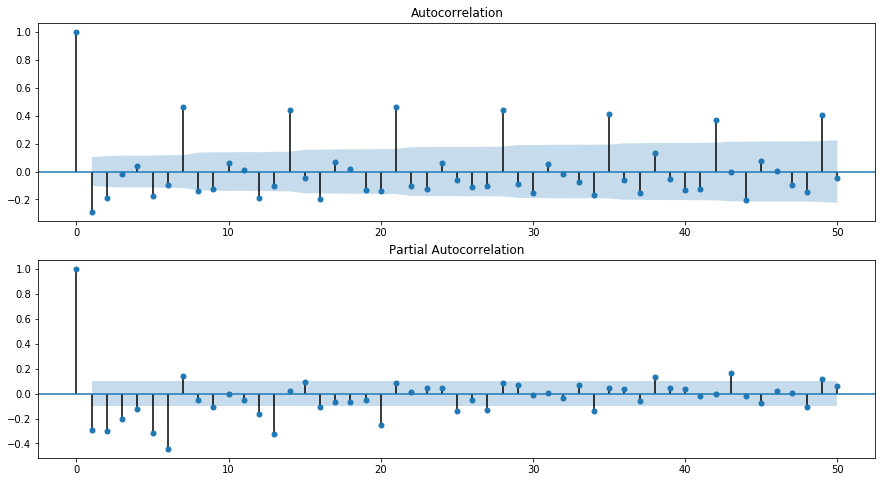

In [94]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_42_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_42_log_diff1, lags=50, ax=ax[1])
plt.show()

In [95]:
model_42 = sm.tsa.SARIMAX(USE_AMT_42_log,
                          order=(1,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_42_log)
results_42 = model_42.fit()
print (results_42.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                  80.639
Date:                           Mon, 09 Sep 2019   AIC                           -151.278
Time:                                   22:48:20   BIC                           -131.889
Sample:                                        0   HQIC                          -143.566
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.0658      0.045      1.472      0.141      -0.022       0.153
ar.L1          0.3379      0.051      6.571

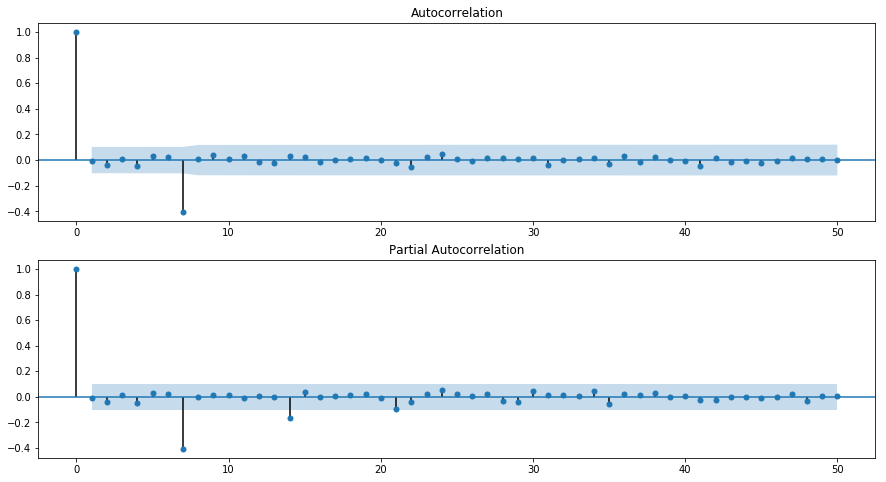

In [96]:
res_42 = results_42.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_42, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_42, lags=50, ax=ax[1])
plt.show()

#43 분석

In [97]:
#모든 변수 분산 안정화 변환
cnt_total_43_log = np.log1p(card_sns_group_43_df['cnt_total'])
USE_AMT_43_log = np.log1p(card_sns_group_43_df['USE_AMT'])

In [98]:
adfuller(cnt_total_43_log) # 43 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [99]:
cnt_total_43_log_diff1 =np.diff(cnt_total_43_log) 
adfuller(cnt_total_43_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

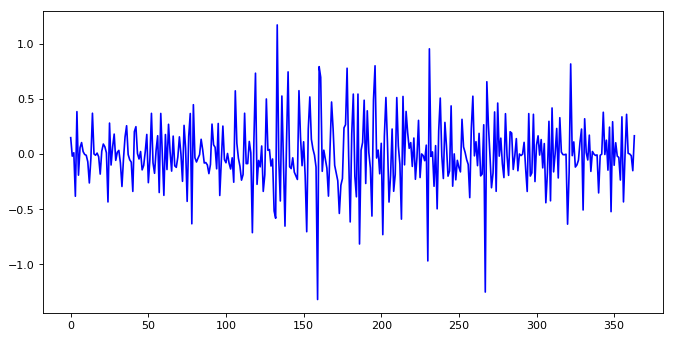

In [210]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_43_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

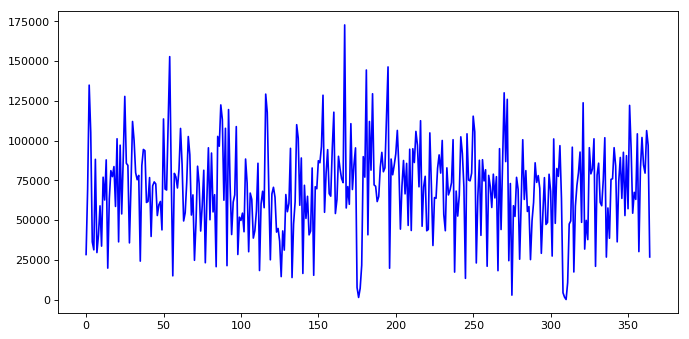

In [211]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_43_df['USE_AMT'], color = 'blue')

In [102]:
adfuller(USE_AMT_43_log) # 43 매출액 : 정상시계열

(-4.608417534519166,
 0.00012463294280286966,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 604.3075815672338)

In [103]:
USE_AMT_43_log_diff1 = np.diff(USE_AMT_43_log)
adfuller(USE_AMT_43_log_diff1) #43 매출액 1차 차분 : 정상시계열

(-7.947962052714099,
 3.1821693834197608e-12,
 13,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 622.6034803795728)

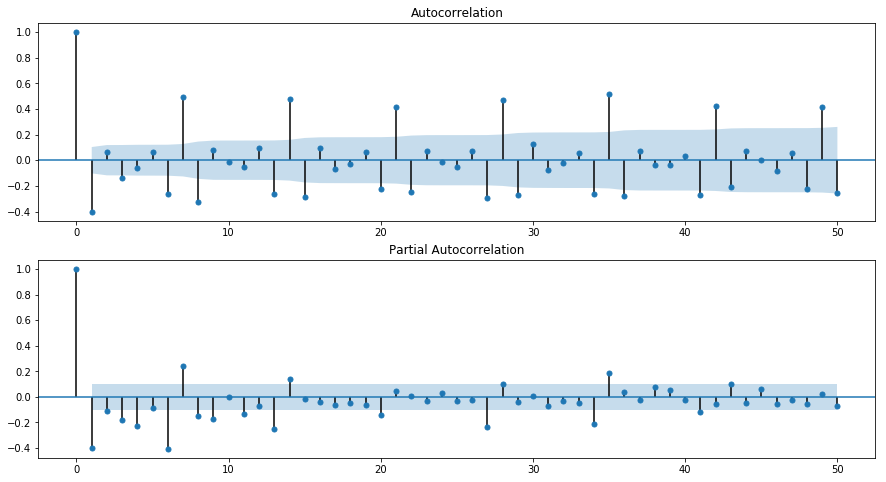

In [104]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_43_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_43_log_diff1, lags=50, ax=ax[1])
plt.show()

In [105]:
model_43 = sm.tsa.SARIMAX(USE_AMT_43_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,1,7),
                         exog =cnt_total_43_log)
results_43 = model_43.fit()
print (results_43.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -274.116
Date:                           Mon, 09 Sep 2019   AIC                            560.233
Time:                                   22:48:25   BIC                            583.499
Sample:                                        0   HQIC                           569.487
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.4112      0.110      3.741      0.000       0.196       0.627
ar.L1          0.5052      0.034     14.816

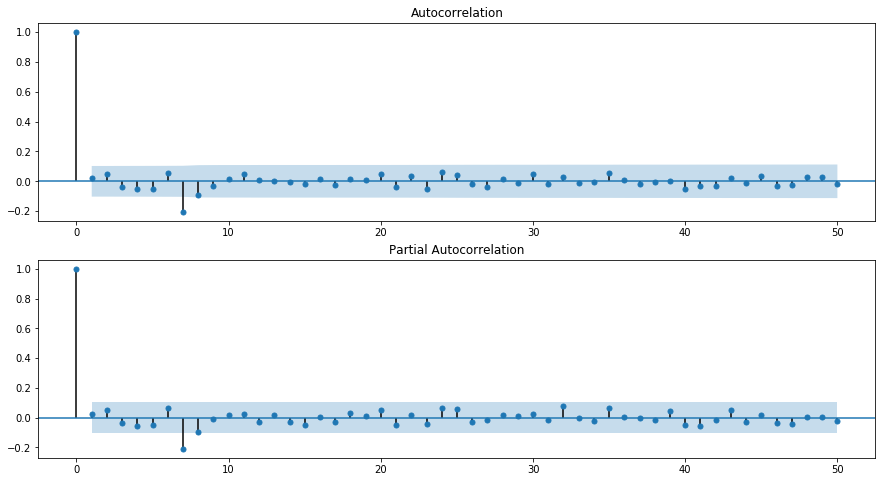

In [106]:
res_43 = results_43.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_43, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_43, lags=50, ax=ax[1])
plt.show()

#44 분석

In [107]:
#모든 변수 분산 안정화 변환
cnt_total_44_log = np.log1p(card_sns_group_44_df['cnt_total'])
USE_AMT_44_log = np.log1p(card_sns_group_44_df['USE_AMT'])

In [108]:
adfuller(cnt_total_44_log) # 44 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [109]:
cnt_total_44_log_diff1 =np.diff(cnt_total_44_log) 
adfuller(cnt_total_44_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

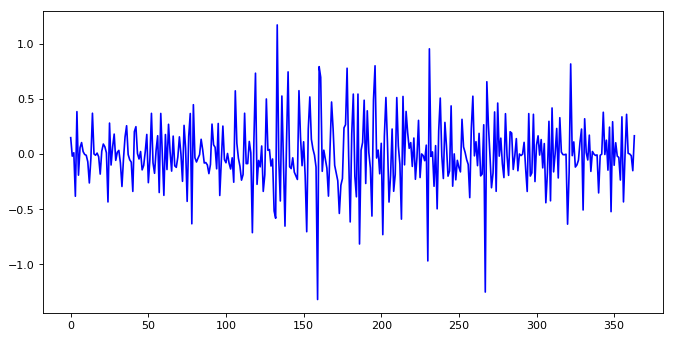

In [212]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_44_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

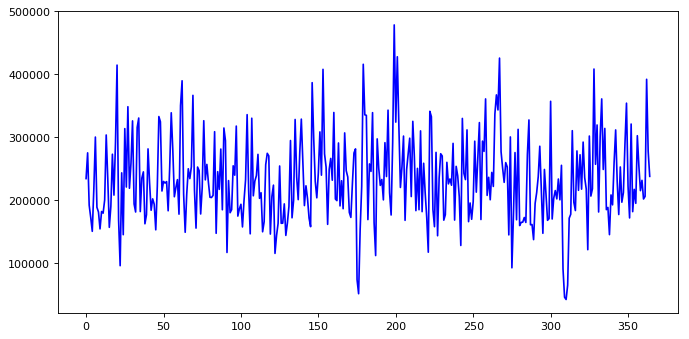

In [213]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_44_df['USE_AMT'], color = 'blue')

In [112]:
adfuller(USE_AMT_44_log) # 44 매출액 : 정상시계열

(-4.589593218658397,
 0.00013499649070952563,
 17,
 347,
 {'1%': -3.449336554273722,
  '5%': -2.8699055166063085,
  '10%': -2.571226758215748},
 152.76713126506513)

In [113]:
USE_AMT_44_log_diff1 = np.diff(USE_AMT_44_log)
adfuller(USE_AMT_44_log_diff1) #43 매출액 1차 차분 : 정상시계열

(-9.928410943983378,
 2.865730886951656e-17,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 167.212389291132)

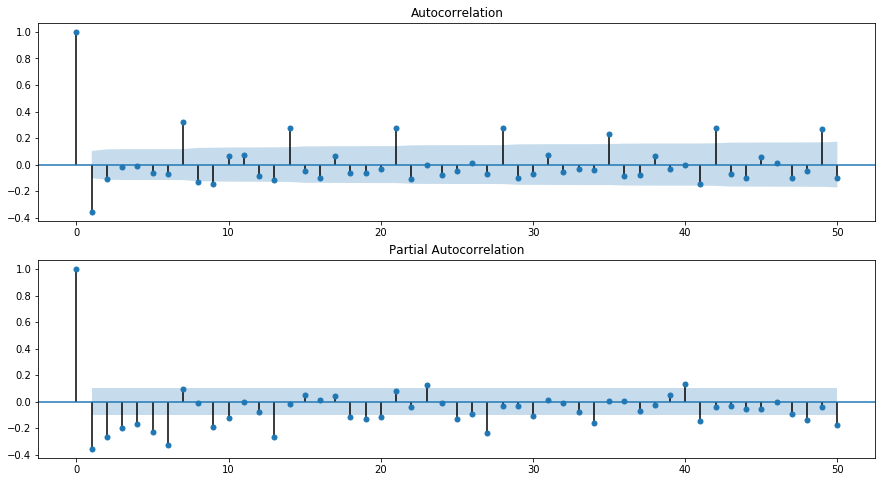

In [114]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_44_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_44_log_diff1, lags=50, ax=ax[1])
plt.show()

In [115]:
model_44 = sm.tsa.SARIMAX(USE_AMT_44_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,1,7),
                         exog =cnt_total_44_log)
results_44 = model_44.fit()
print (results_44.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -49.148
Date:                           Mon, 09 Sep 2019   AIC                            110.295
Time:                                   22:48:30   BIC                            133.562
Sample:                                        0   HQIC                           119.549
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.2501      0.055      4.587      0.000       0.143       0.357
ar.L1          0.2552      0.052      4.883

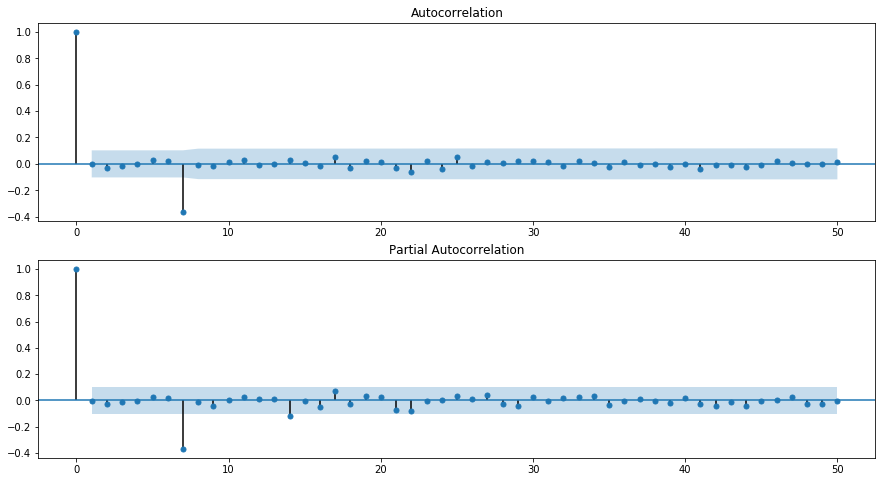

In [116]:
res_44 = results_44.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_44, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_44, lags=50, ax=ax[1])
plt.show()

#50 분석

In [117]:
#모든 변수 분산 안정화 변환
cnt_total_50_log = np.log1p(card_sns_group_50_df['cnt_total'])
USE_AMT_50_log = np.log1p(card_sns_group_50_df['USE_AMT'])

In [118]:
adfuller(cnt_total_50_log) # 50 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [119]:
cnt_total_50_log_diff1 =np.diff(cnt_total_50_log) 
adfuller(cnt_total_50_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

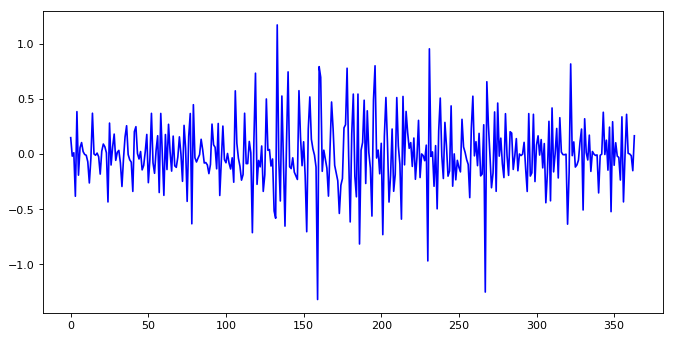

In [214]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_50_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

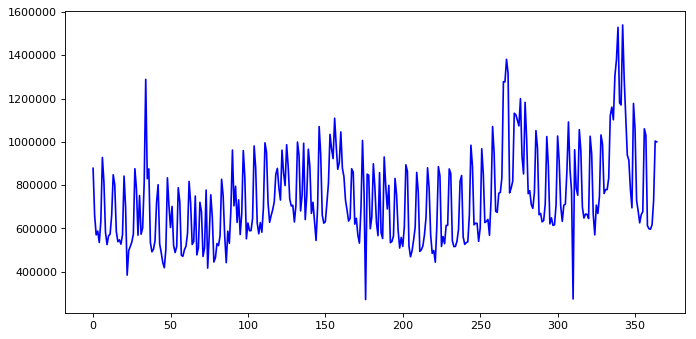

In [215]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_50_df['USE_AMT'], color = 'blue')

In [122]:
adfuller(USE_AMT_50_log) # 50 매출액 : 비정상시계열

(-2.6195320038781276,
 0.08902721791793589,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -230.25244935131184)

In [123]:
statsmodels.tsa.stattools.coint(USE_AMT_50_log, cnt_total_50_log, trend = 'nc') #H0 : "공적분 존재 안함" 기각 못함

(-1.864001038172038, 0.29207946865846646, [nan, nan, nan])

In [124]:
USE_AMT_50_log_diff1 = np.diff(USE_AMT_50_log)
adfuller(USE_AMT_50_log_diff1) #50 매출액 1차 차분 : 정상시계열

(-7.322071377054472,
 1.186985540051867e-10,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -223.4708965549089)

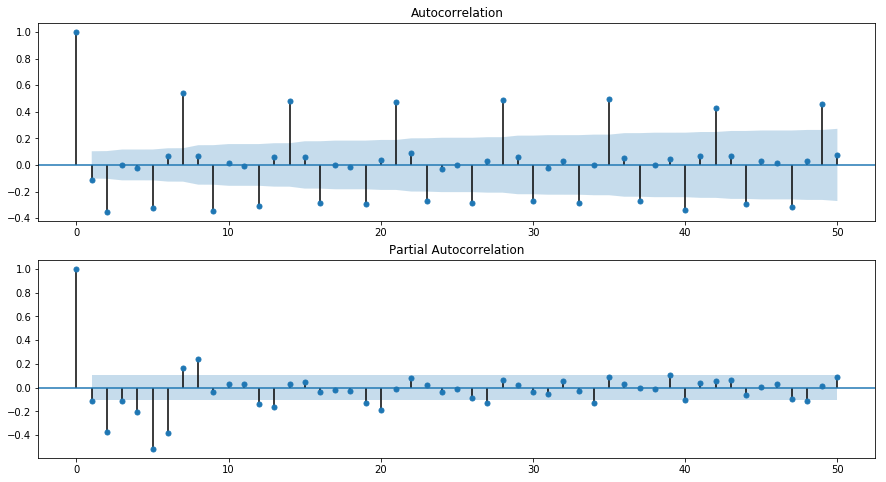

In [125]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_50_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_50_log_diff1, lags=50, ax=ax[1])
plt.show()

In [126]:
model_50 = sm.tsa.SARIMAX(USE_AMT_50_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,1,7),
                         exog =cnt_total_50_log)
results_50 = model_50.fit()
print (results_50.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 155.020
Date:                           Mon, 09 Sep 2019   AIC                           -298.039
Time:                                   22:48:36   BIC                           -274.773
Sample:                                        0   HQIC                          -288.785
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.0074      0.026      0.289      0.772      -0.043       0.058
ar.L1          0.1860      0.066      2.820

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


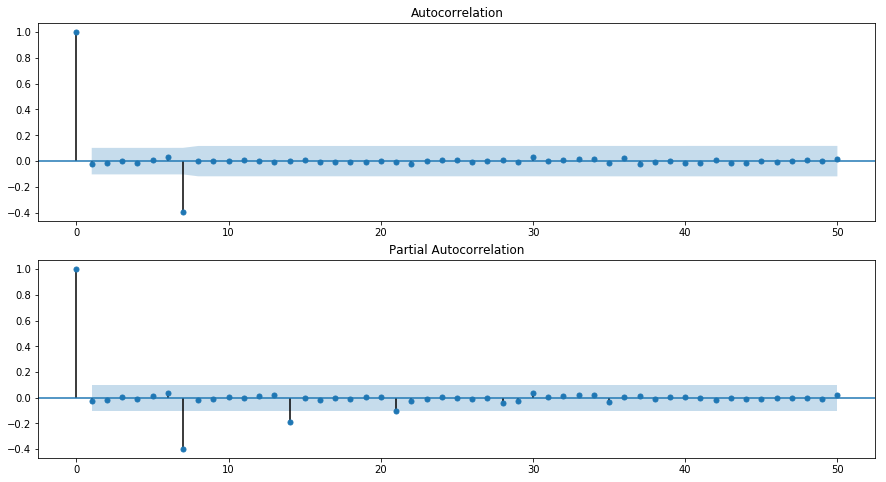

In [127]:
res_50 = results_50.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_50, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_50, lags=50, ax=ax[1])
plt.show()

#62 분석

In [244]:
#모든 변수 분산 안정화 변환
cnt_total_62_log = np.log1p(card_sns_group_62_df['cnt_total'])
USE_AMT_62_log = np.log1p(card_sns_group_62_df['USE_AMT'])

In [228]:
adfuller(cnt_total_62_log) # 62 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [229]:
cnt_total_62_log_diff1 =np.diff(cnt_total_62_log) 
adfuller(cnt_total_62_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

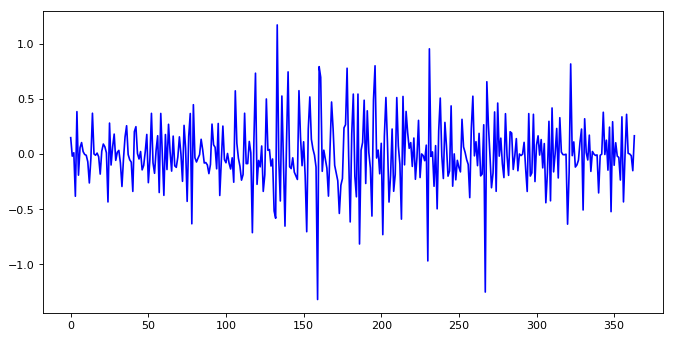

In [230]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_62_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

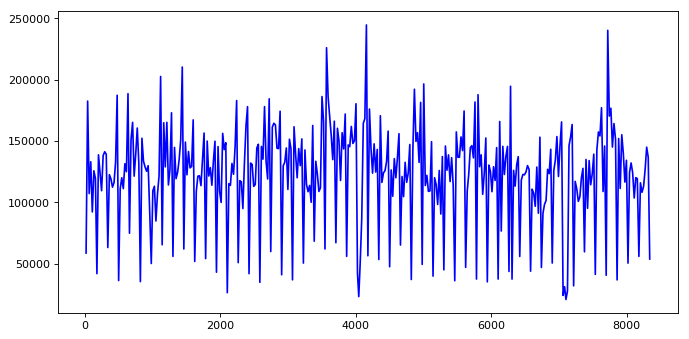

In [231]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_62_df['USE_AMT'], color = 'blue')

In [232]:
adfuller(USE_AMT_62_log) # 62 매출액 : 정상시계열

(-4.354607239574967,
 0.00035682585549780575,
 15,
 349,
 {'1%': -3.449226932880019,
  '5%': -2.869857365438656,
  '10%': -2.571201085130664},
 109.75382033651044)

In [240]:
USE_AMT_62_log_diff1 = np.diff(USE_AMT_62_log)
adfuller(USE_AMT_62_log_diff1) #62 매출액 1차 차분 : 정상시계열

(-7.530389998633607,
 3.591476182482832e-11,
 17,
 346,
 {'1%': -3.4493918438232525,
  '5%': -2.8699298018856574,
  '10%': -2.5712397066390458},
 124.79281930544357)

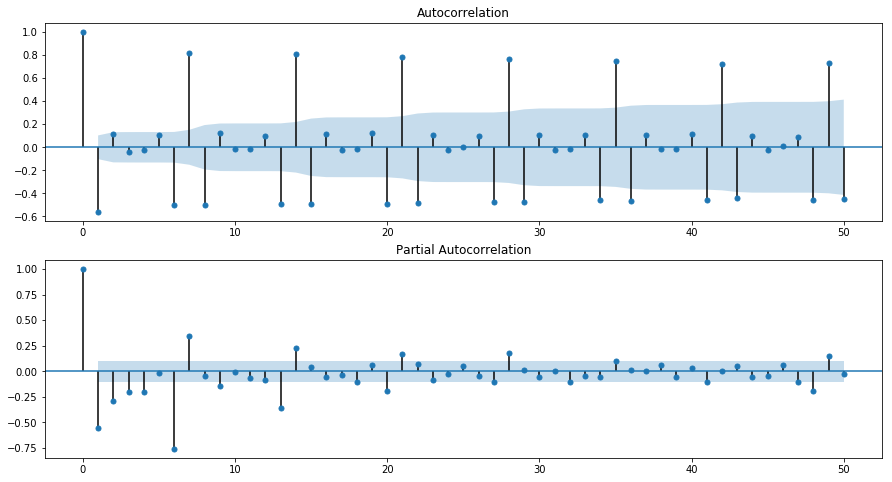

In [241]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_62_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_62_log_diff1, lags=50, ax=ax[1])
plt.show()

In [242]:
card_sns_group_62_df.head()

,index,time,MCT_CAT_CD,USE_AMT,cnt_total
0,16,2018-04-01,62,58723,2419
1,39,2018-04-02,62,182590,2811
2,62,2018-04-03,62,107212,2762
3,85,2018-04-04,62,133178,2799
4,108,2018-04-05,62,92224,1911


In [245]:
model_62 = sm.tsa.SARIMAX(USE_AMT_62_log,
                          order=(1,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_62_log)
results_62 = model_62.fit()
print (results_62.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                   0.991
Date:                           Mon, 09 Sep 2019   AIC                              8.017
Time:                                   23:06:36   BIC                             27.406
Sample:                                        0   HQIC                            15.729
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.2346      0.043      5.405      0.000       0.150       0.320
ar.L1          0.3897      0.041      9.460

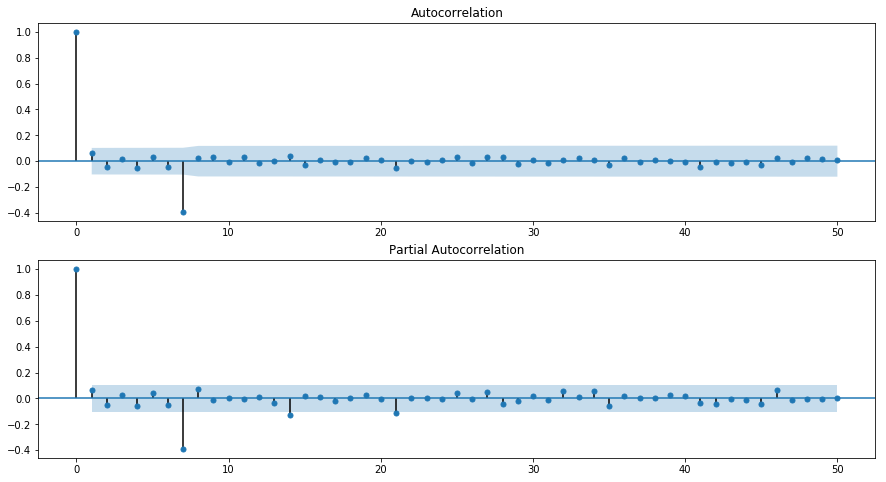

In [138]:
res_62 = results_62.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_62, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_62, lags=50, ax=ax[1])
plt.show()

#70 분석

In [139]:
#모든 변수 분산 안정화 변환
cnt_total_70_log = np.log1p(card_sns_group_70_df['cnt_total'])
USE_AMT_70_log = np.log1p(card_sns_group_70_df['USE_AMT'])

In [140]:
adfuller(cnt_total_70_log) # 70 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [141]:
cnt_total_70_log_diff1 =np.diff(cnt_total_70_log) 
adfuller(cnt_total_70_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

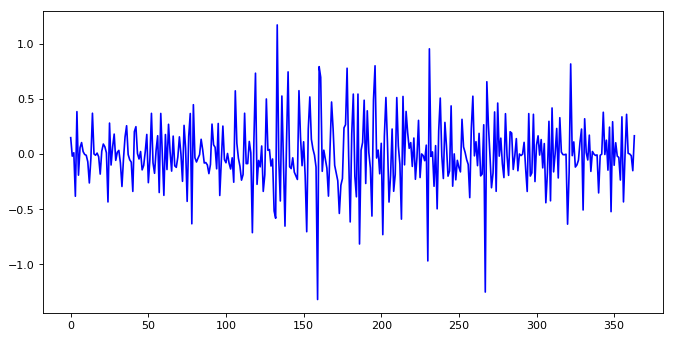

In [246]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_70_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

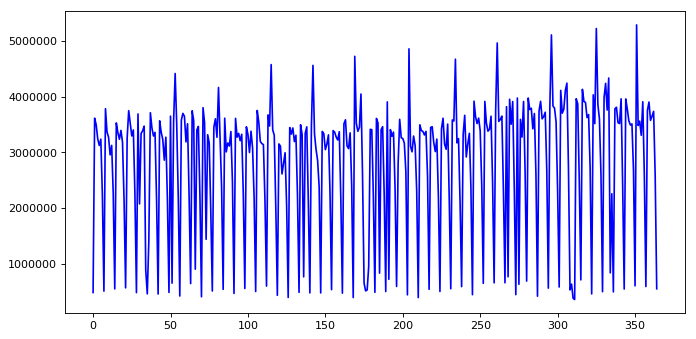

In [247]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_70_df['USE_AMT'], color = 'blue')

In [144]:
adfuller(USE_AMT_70_log) # 70 매출액 : 정상시계열

(-4.96581345488633,
 2.592323241628467e-05,
 15,
 349,
 {'1%': -3.449226932880019,
  '5%': -2.869857365438656,
  '10%': -2.571201085130664},
 385.7803610631672)

In [145]:
USE_AMT_70_log_diff1 = np.diff(USE_AMT_70_log)
adfuller(USE_AMT_70_log_diff1) #70 매출액 1차 차분 : 정상시계열

(-7.45385561710125,
 5.5787794412970704e-11,
 15,
 348,
 {'1%': -3.4492815848836296,
  '5%': -2.8698813715275406,
  '10%': -2.5712138845950587},
 408.0721707433223)

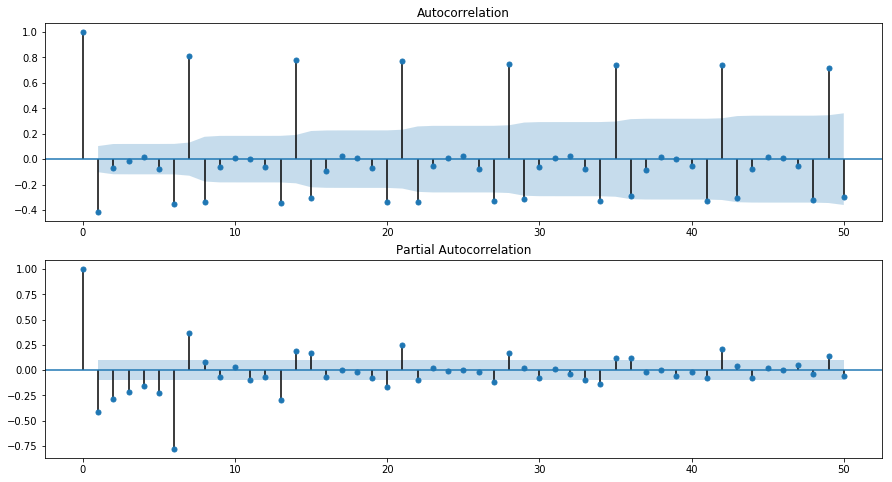

In [146]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_70_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_70_log_diff1, lags=50, ax=ax[1])
plt.show()

In [147]:
model_70 = sm.tsa.SARIMAX(USE_AMT_70_log,
                          order=(1,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_70_log)
results_70 = model_70.fit()
print (results_70.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -117.610
Date:                           Mon, 09 Sep 2019   AIC                            245.219
Time:                                   22:48:45   BIC                            264.608
Sample:                                        0   HQIC                           252.931
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.4710      0.051      9.174      0.000       0.370       0.572
ar.L1          0.2271      0.037      6.212

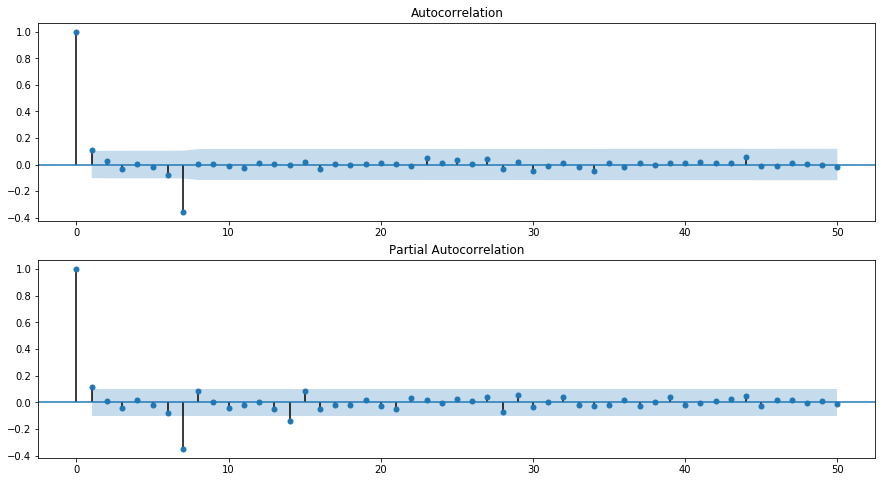

In [148]:
res_70 = results_70.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_70, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_70, lags=50, ax=ax[1])
plt.show()

#71 분석

In [149]:
#모든 변수 분산 안정화 변환
cnt_total_71_log = np.log1p(card_sns_group_71_df['cnt_total'])
USE_AMT_71_log = np.log1p(card_sns_group_71_df['USE_AMT'])

In [150]:
adfuller(cnt_total_71_log) # 71 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [151]:
cnt_total_71_log_diff1 =np.diff(cnt_total_71_log) 
adfuller(cnt_total_71_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

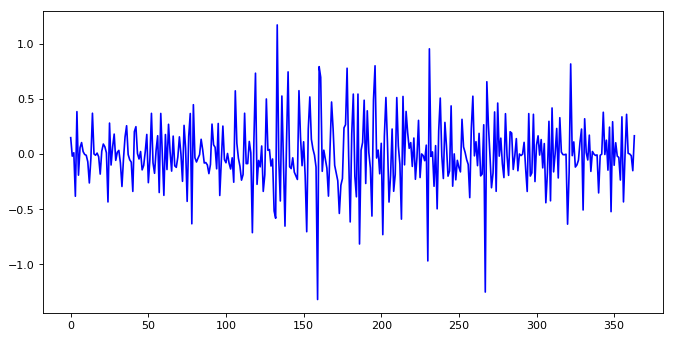

In [248]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_71_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

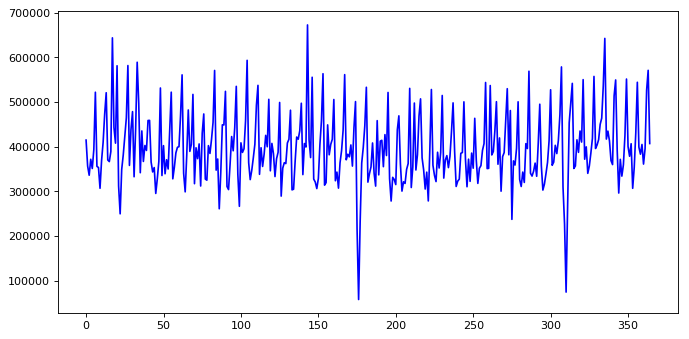

In [249]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_71_df['USE_AMT'], color = 'blue')

In [154]:
adfuller(USE_AMT_71_log) # 71 매출액 : 정상시계열

(-3.76410412127861,
 0.003296684683762993,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -139.03322210112685)

In [155]:
USE_AMT_71_log_diff1 = np.diff(USE_AMT_71_log)
adfuller(USE_AMT_71_log_diff1) #71 매출액 1차 차분 : 정상시계열

(-11.422236499848998,
 6.829005699864232e-21,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -124.7555747460242)

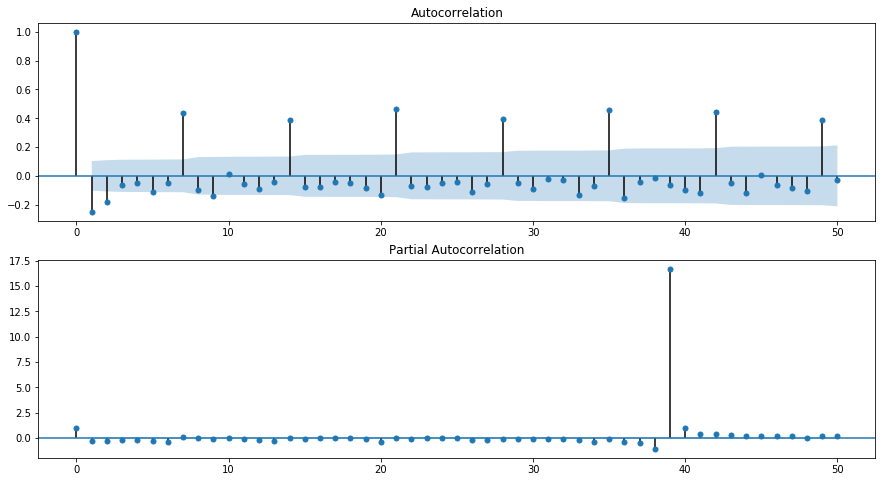

In [251]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_71_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_71_log_diff1, lags=50, ax=ax[1])
plt.show()

In [157]:
model_71 = sm.tsa.SARIMAX(USE_AMT_71_log,
                          order=(1,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_71_log)
results_71 = model_71.fit()
print (results_71.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 126.079
Date:                           Mon, 09 Sep 2019   AIC                           -242.158
Time:                                   22:48:49   BIC                           -222.770
Sample:                                        0   HQIC                          -234.446
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.1523      0.039      3.894      0.000       0.076       0.229
ar.L1          0.3105      0.050      6.209

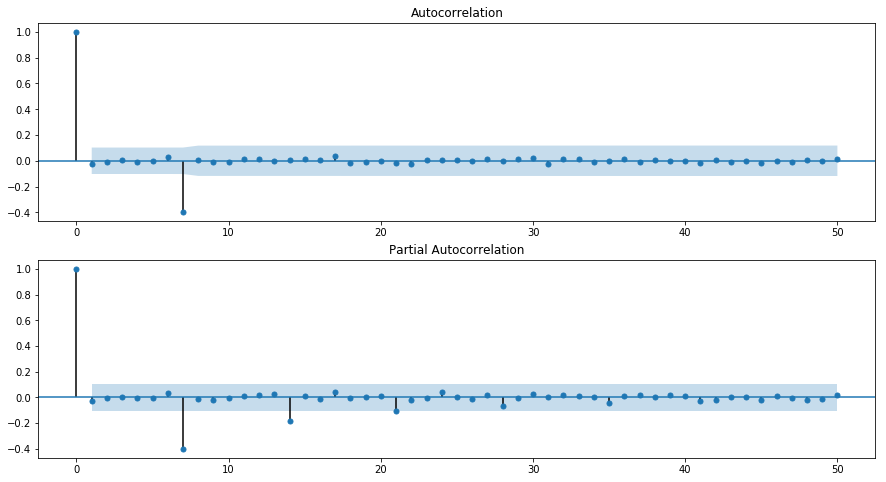

In [158]:
res_71 = results_71.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_71, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_71, lags=50, ax=ax[1])
plt.show()


#80 분석

In [159]:
#모든 변수 분산 안정화 변환
cnt_total_80_log = np.log1p(card_sns_group_80_df['cnt_total'])
USE_AMT_80_log = np.log1p(card_sns_group_80_df['USE_AMT'])

In [160]:
adfuller(cnt_total_80_log) # 80 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [161]:
cnt_total_80_log_diff1 =np.diff(cnt_total_80_log) 
adfuller(cnt_total_80_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

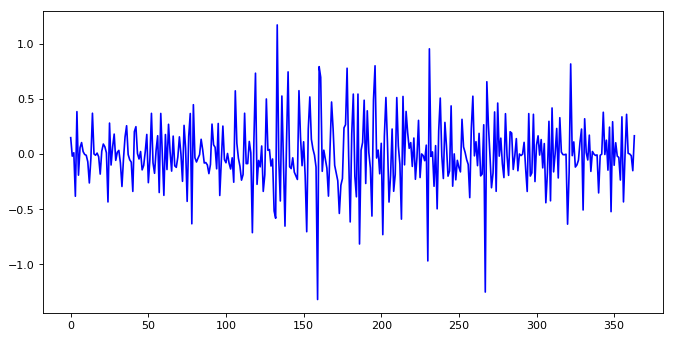

In [252]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_80_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

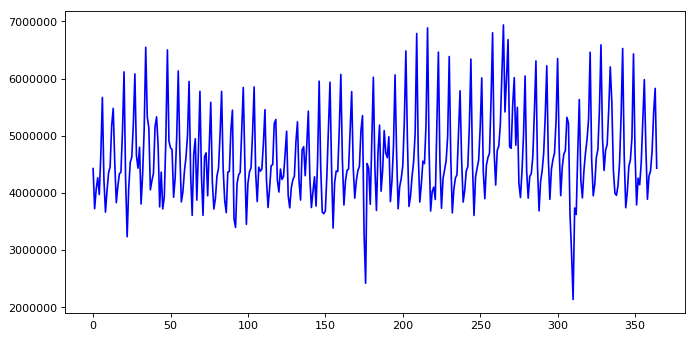

In [253]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_80_df['USE_AMT'], color = 'blue')

In [164]:
adfuller(USE_AMT_80_log) # 80 매출액 : 정상시계열

(-3.7032574332934196,
 0.00406756802880014,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -645.773006686703)

In [165]:
USE_AMT_80_log_diff1 = np.diff(USE_AMT_80_log)
adfuller(USE_AMT_80_log_diff1) #80 매출액 1차 차분 : 정상시계열

(-10.034141339755045,
 1.5567159338835778e-17,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -630.7927765186939)

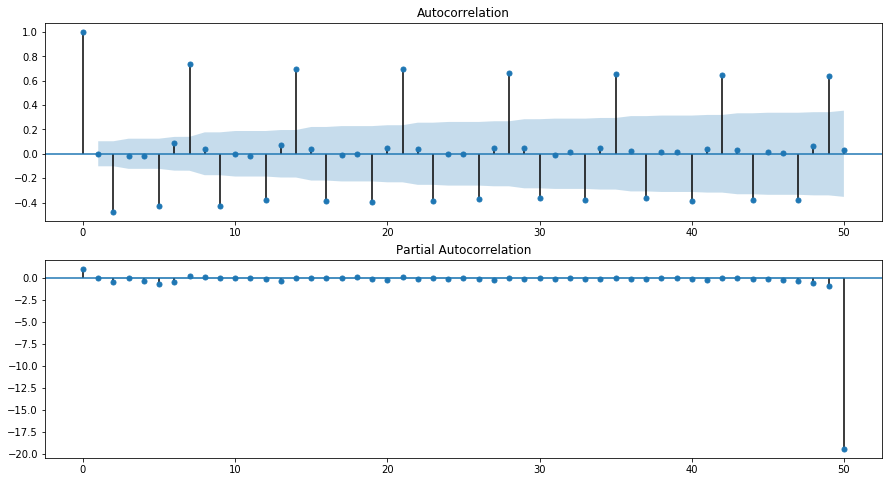

In [166]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_80_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_80_log_diff1, lags=50, ax=ax[1])
plt.show()

In [167]:
model_80 = sm.tsa.SARIMAX(USE_AMT_80_log,
                          order=(1,1,1),
                          seasonal_order=(1,1,1,7),
                         exog =cnt_total_80_log)
results_80 = model_80.fit()
print (results_80.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 375.830
Date:                           Mon, 09 Sep 2019   AIC                           -739.661
Time:                                   22:48:55   BIC                           -716.394
Sample:                                        0   HQIC                          -730.407
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.0237      0.015      1.630      0.103      -0.005       0.052
ar.L1          0.5019      0.028     17.917

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


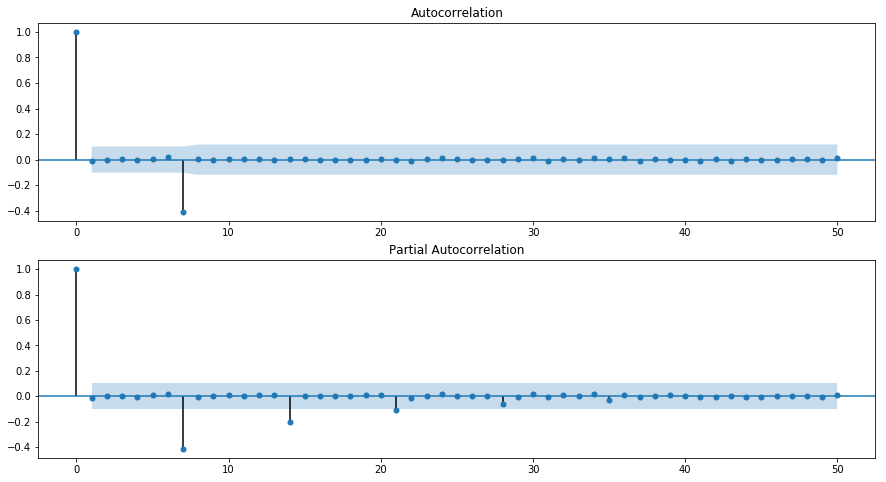

In [168]:
res_80 = results_80.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_80, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_80, lags=50, ax=ax[1])
plt.show()

#81 분석

In [169]:
#모든 변수 분산 안정화 변환
cnt_total_81_log = np.log1p(card_sns_group_81_df['cnt_total'])
USE_AMT_81_log = np.log1p(card_sns_group_81_df['USE_AMT'])

In [170]:
adfuller(cnt_total_81_log) # 81 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [171]:
cnt_total_81_log_diff1 =np.diff(cnt_total_81_log) 
adfuller(cnt_total_81_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

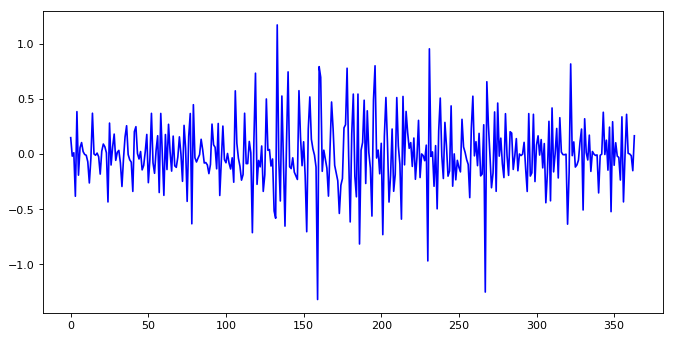

In [254]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_81_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

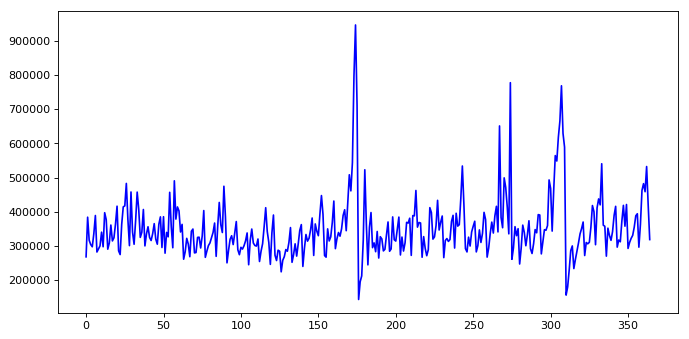

In [255]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_81_df['USE_AMT'], color = 'blue')

In [174]:
adfuller(USE_AMT_81_log) # 81 매출액 : 정상시계열

(-4.642699377472657,
 0.00010767951798439432,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -150.33722159219144)

In [175]:
USE_AMT_81_log_diff1 = np.diff(USE_AMT_81_log)
adfuller(USE_AMT_81_log_diff1) #81 매출액 1차 차분 : 정상시계열

(-9.242717105541315,
 1.5668111340178702e-15,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 -129.50332980641633)

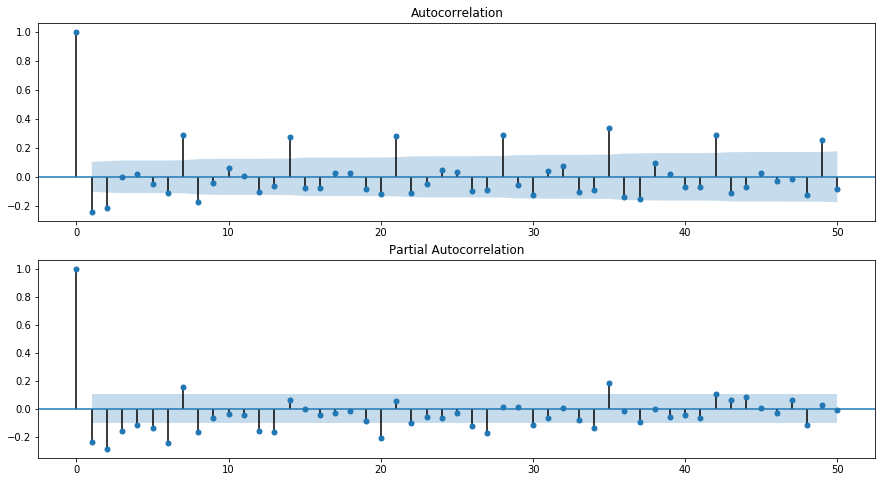

In [176]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_81_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_81_log_diff1, lags=50, ax=ax[1])
plt.show()

In [177]:
model_81 = sm.tsa.SARIMAX(USE_AMT_81_log,
                          order=(0,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_81_log)
results_81 = model_81.fit()
print (results_81.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                  92.675
Date:                           Mon, 09 Sep 2019   AIC                           -177.349
Time:                                   22:48:59   BIC                           -161.838
Sample:                                        0   HQIC                          -171.180
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.1457      0.042      3.440      0.001       0.063       0.229
ma.L1         -0.4104      0.030    -13.611

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


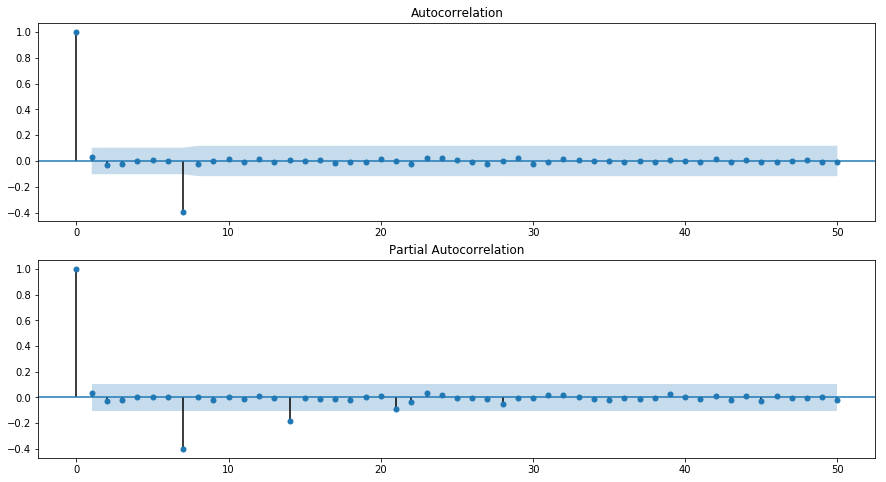

In [178]:
res_81 = results_81.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_81, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_81, lags=50, ax=ax[1])
plt.show()

#92 분석

In [179]:
#모든 변수 분산 안정화 변환
cnt_total_92_log = np.log1p(card_sns_group_92_df['cnt_total'])
USE_AMT_92_log = np.log1p(card_sns_group_92_df['USE_AMT'])

In [180]:
adfuller(cnt_total_92_log) # 92 log_미세먼지 언급량 : 비정상 시계열

(-1.4351746596653805,
 0.5653016680899656,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 20.737667821259834)

In [181]:
cnt_total_92_log_diff1 =np.diff(cnt_total_92_log) 
adfuller(cnt_total_92_log_diff1) #log_미세먼지 언급량 1차 차분 : 정상시계열

(-9.457455442132723,
 4.445500703753443e-16,
 12,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 21.8389587018072)

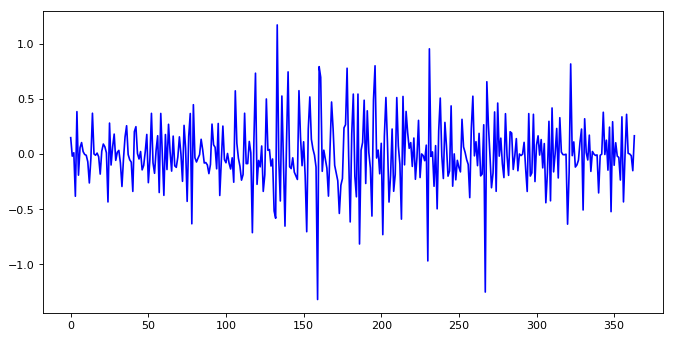

In [256]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(cnt_total_92_log_diff1, color = 'blue') #log_미세먼지 언급량 1차 차분 plot

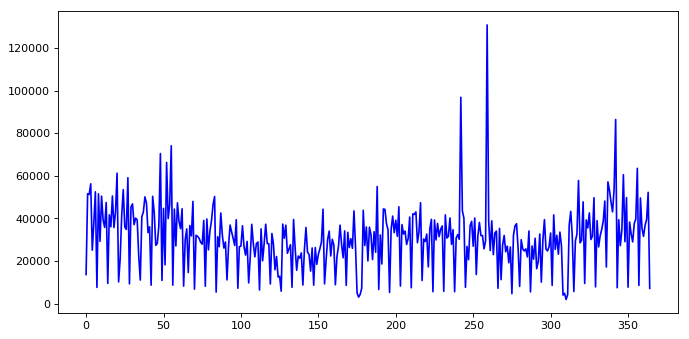

In [257]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(card_sns_group_92_df['USE_AMT'], color = 'blue')

In [184]:
adfuller(USE_AMT_92_log) # 92 매출액 : 비정상시계열

(-3.354642627152299,
 0.012605771241991815,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 450.5797365280737)

In [185]:
USE_AMT_92_log_diff1 = np.diff(USE_AMT_92_log)
adfuller(USE_AMT_92_log_diff1) #92 매출액 1차 차분 : 정상시계열

(-8.245997449635855,
 5.55221589655389e-13,
 13,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 459.9936213442845)

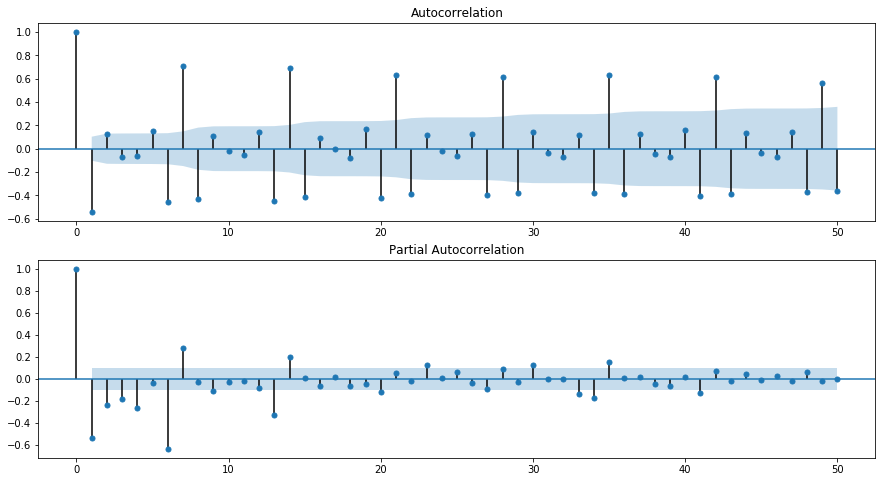

In [186]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(USE_AMT_92_log_diff1, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(USE_AMT_92_log_diff1, lags=50, ax=ax[1])
plt.show()

In [187]:
model_92 = sm.tsa.SARIMAX(USE_AMT_92_log,
                          order=(1,1,1),
                          seasonal_order=(0,1,1,7),
                         exog =cnt_total_92_log)
results_92 = model_92.fit()
print (results_92.summary())

                                 Statespace Model Results                                
Dep. Variable:                           USE_AMT   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -175.084
Date:                           Mon, 09 Sep 2019   AIC                            360.167
Time:                                   22:49:04   BIC                            379.556
Sample:                                        0   HQIC                           367.879
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cnt_total      0.5091      0.070      7.272      0.000       0.372       0.646
ar.L1          0.3066      0.043      7.178

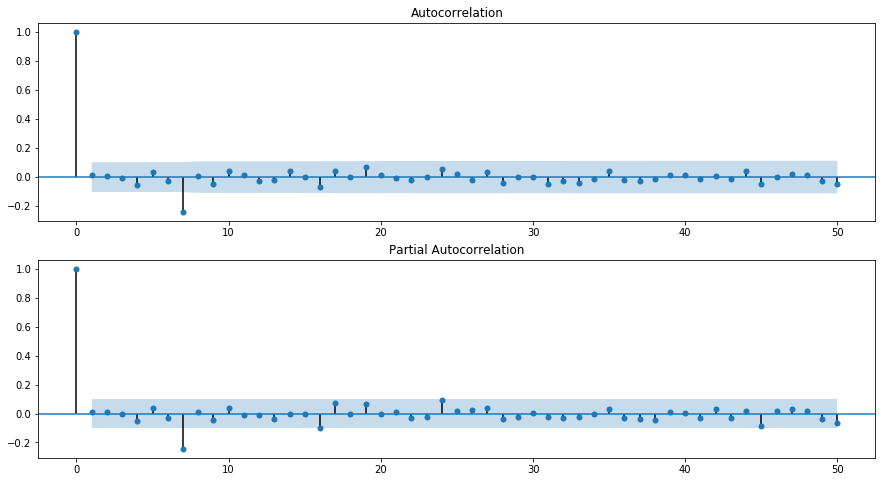

In [188]:
res_92 = results_92.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_92, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_92, lags=50, ax=ax[1])
plt.show()